# E- Commerce - Users of C2C Fashion Store




## Context
There are a lot of unknowns when running an E-commerce store, even when you have analytics to guide your decisions.
Users are an important factor in an e-commerce business.
This is especially true in a C2C-oriented store, since they are both the suppliers (by uploading their products) AND the customers (by purchasing other user's articles).


## Introduction to the Project

This project focuses on understanding the buying behavior of users in a consumer-to-consumer (C2C) fashion e-commerce store. C2C marketplaces provide a platform where individual users can both buy and sell fashion items. The goal of this analysis is to leverage user data to predict the likelihood of a user making a purchase, which is valuable for understanding customer behavior, optimizing marketing strategies, and personalizing user experiences.

The dataset represents user activity on this C2C platform, containing features that may include user demographics, session data, browsing behavior, and possibly prior purchase history. These insights are crucial for identifying key drivers of purchase decisions in a C2C fashion context

.trvals.

## Goal of the Project
The goal of this project is to predict the probability of a user making a purchase based on various user attributes. By predicting purchase likelihood, we can gain actionable insights into the factors that drive buying behavior in a C2C fashion environment. This model will help the platform to target potential buyers more effectively and enhance user engagement..

## Main Objective

The main objective of this project is to build a predictive model that can classify users based on their likelihood to purchase items on the platform. The key steps in achieving this objective are:

Data Exploration: Analyze and understand the data's structure, relationships, and patterns.
Data Preprocessing: Clean and prepare the data for modeling, including handling missing values, encoding categorical variables, and scaling features.
Feature Engineering: Create new features or select important ones to improve model accuracy and interpretability.
Model Building: Develop and evaluate classification models to predict purchase likelihood.
Performance Evaluation: Assess model performance using key metrics to ensure reliable predictions.

## Description
Explore user behaviour of a successful website to get benchmarks. Get actionable insights about online sales and clients


## Data Story

This dataset likely includes features that capture a user’s interaction with the platform, such as the number of sessions, time spent, product views, wishlist activity, and demographic details (e.g., age, location). These attributes help paint a picture of the typical C2C fashion store user, with characteristics that may correlate with their purchasing behavior.

The target variable productsBought indicates if a user has completed a purchase, and the challenge is to identify which of the features most influence this outcome. By analyzing these variables, we aim to uncover trends and patterns that indicate high purchase likelihood, such as users who engage frequently with the platform or show high interest in specific product categories.

## Content
The data was scraped from a successful online C2C fashion store with over 9M registered users. The store was first launched in Europe around 2009 then expanded worldwide.


## Summary
##### Foreword
This users dataset is a preview of a much bigger dataset, with lots of related data (product listings of sellers, comments on listed products, etc...).


 ## Data Preprocessing

### Import necessary libraries and the dataset.
#### Importing Necessary Libraries For Data Analysis, Visualization, and Model Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.preprocessing import  LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##### Ignore Warning

In [3]:
import warnings #ignore warning
warnings.filterwarnings("ignore")

##  Importing The Data

### Loading the E-Commerce Users of a C2C Fashion Store

In [6]:
df = pd.read_csv("C:\\Users\\PRIYANKA P\\Documents\\DSML FINAL PROJECT\\E-commerce - Users of a C2C fashion store.csv")

## Describe the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [14]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [16]:
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,1.902340e+09,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,1.285837e+09,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,6.544300e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,8.190688e+08,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,1.638924e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,2.996175e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [18]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


In [20]:
print(df.describe())

       identifierHash  socialNbFollowers  socialNbFollows  \
count    9.891300e+04       98913.000000     98913.000000   
mean     1.902340e+09           3.432269         8.425677   
std      1.285837e+09           3.882383        52.839572   
min      6.544300e+04           3.000000         0.000000   
25%      8.190688e+08           3.000000         8.000000   
50%      1.638924e+09           3.000000         8.000000   
75%      2.996175e+09           3.000000         8.000000   
max      4.294967e+09         744.000000     13764.000000   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
count         98913.000000    98913.000000  98913.000000      98913.000000   
mean              4.420743        0.093304      0.121592          0.812303   
std             181.030569        2.050144      2.126895          8.500205   
min               0.000000        0.000000      0.000000          0.000000   
25%               0.000000        0.000000      0.000000    

In [22]:
df.shape

(98913, 24)

### Rows = 98913 and Columns = 24

In [25]:
df.tail()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.8,8.9,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.8,8.9,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.8,8.9,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.8,8.9,it
98912,3957391266,user,Guinée,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,561,3204,106.8,8.9,gn


### Check for Null Values

In [28]:
df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [30]:
null_counts = df.isnull().sum()
print(null_counts)

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64


#### There is no null values present in the dataset

### Handling Duplicates

In [34]:
df.duplicated().sum()

0

#### There is no duplicates present in the dataset

### Columns used in the dataset

In [38]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [40]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column)

type
country
language
gender
civilityTitle
countryCode


#### Checking Unique Values

In [43]:
df_col = df.select_dtypes(include=["object"])     # Check Unique Values for each variable
for column in df_col.columns:
    unique_count = df_col[column].nunique()
    print(f"{column} : {df[column].nunique()}")

type : 1
country : 200
language : 5
gender : 2
civilityTitle : 3
countryCode : 199


In [45]:
df.describe().round(2)

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00
mean,1.902340e+09,3.43,8.43,4.42,0.09,0.12,0.81,1.56,0.17,1.77,581.29,3063.77,102.13,8.51
std,1.285837e+09,3.88,52.84,181.03,2.05,2.13,8.50,25.19,2.33,0.43,208.86,168.30,5.61,0.47
min,6.544300e+04,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,11.00,2852.00,95.07,7.92
25%,8.190688e+08,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,572.00,2857.00,95.23,7.94
50%,1.638924e+09,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,694.00,3196.00,106.53,8.88
75%,2.996175e+09,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,702.00,3201.00,106.70,8.89
max,4.294967e+09,744.00,13764.00,51671.00,244.00,174.00,100.00,2635.00,405.00,3.00,709.00,3205.00,106.83,8.90


## Data Vizualization¶

<Axes: xlabel='productsBought', ylabel='Density'>

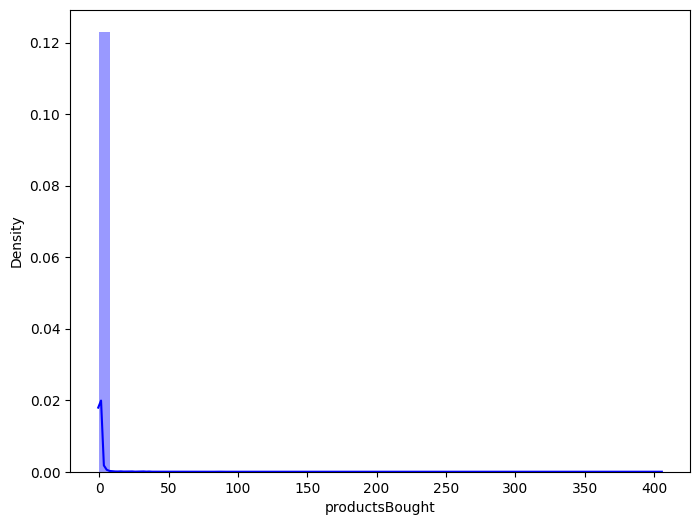

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(df["productsBought"], color = 'Blue')

<Axes: xlabel='productsBought', ylabel='Density'>

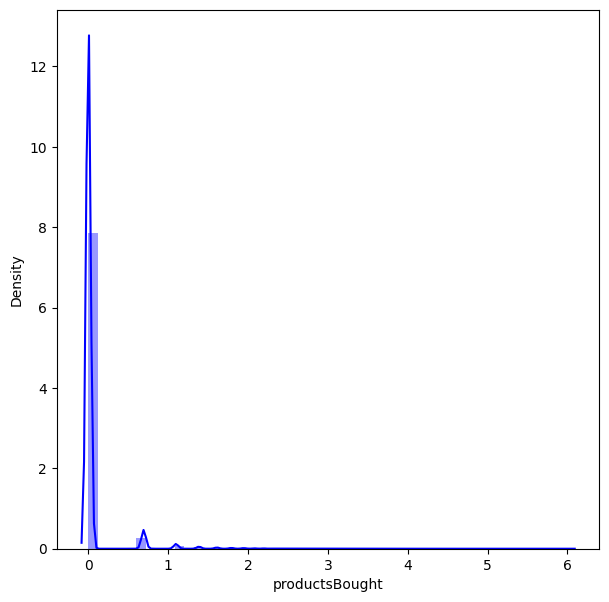

In [50]:
# Apply log transformation to the 'productsBought' column
df["productsBought"] = np.log1p(df["productsBought"])

# Visualize the transformed data
plt.figure(figsize=(7,7))
sns.distplot(df["productsBought"], color = "Blue")

language
en    51564
fr    26372
it     7766
de     7178
es     6033
Name: count, dtype: int64


Text(0, 0.5, '')

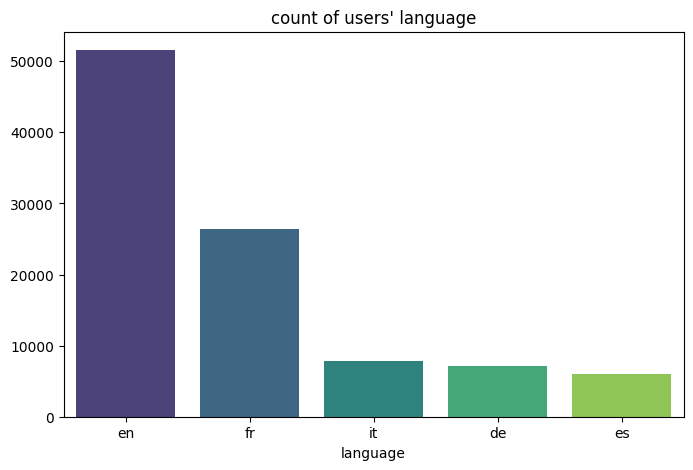

In [52]:
# Value counts for 
df_language = df["language"].value_counts()
print(df_language)

# Bar plot
plt.figure(figsize=(8, 5) )
plt.title("count of users' language")
sns.barplot(x=df_language.index, y=df_language, palette="viridis" )
plt.ylabel("")

countryCode
fr    25135
us    20602
gb    11310
it     8015
de     6567
      ...  
td        1
lc        1
bl        1
um        1
im        1
Name: count, Length: 199, dtype: int64


Text(0, 0.5, '')

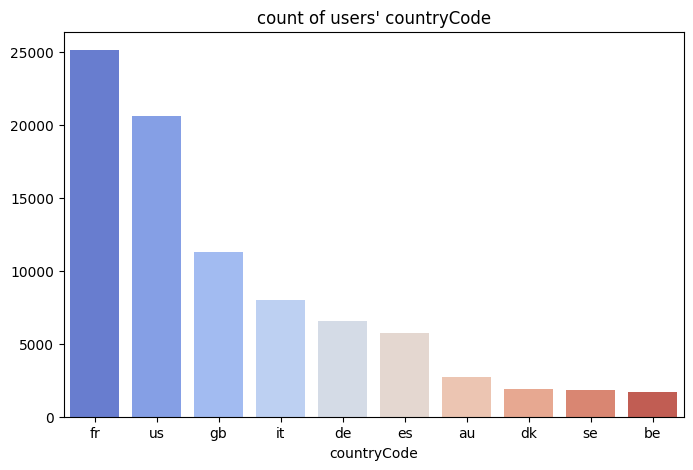

In [54]:
# Value counts for countryCode
df_countryCode = df["countryCode"].value_counts()
print(df_countryCode )

# Bar plot
plt.figure(figsize=(8, 5) )
plt.title("count of users' countryCode")
sns.barplot(x=df_countryCode[:10].index, y=df_countryCode[:10], palette="coolwarm" ) 
plt.ylabel("")

civilityTitle
mrs     75684
mr      22792
miss      437
Name: count, dtype: int64


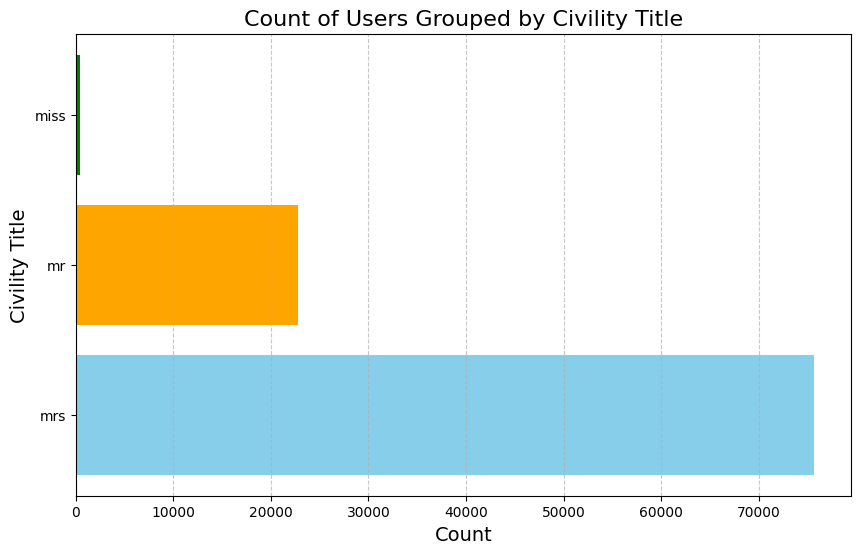

In [56]:
# Value counts for 'civilityTitle'
df_civilityTitle = df['civilityTitle'].value_counts()
print(df_civilityTitle)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_civilityTitle.index, df_civilityTitle.values, color=['skyblue', 'orange', 'green'])
plt.title("Count of Users Grouped by Civility Title", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Civility Title", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

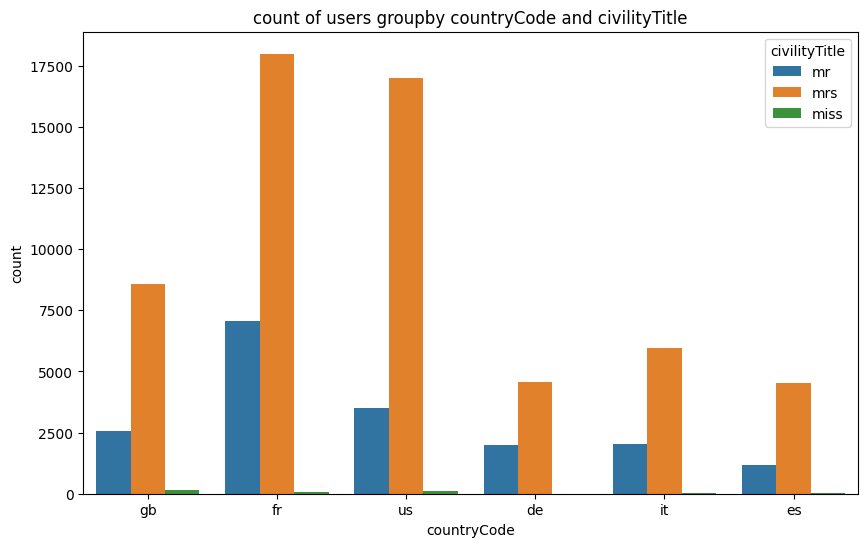

In [58]:
# count of users groupby countryCode and civilityTitle
# Bar plot
plt.figure(figsize=(10, 6))
plt.title("count of users groupby countryCode and civilityTitle" )
sns.countplot(x='countryCode',data=df[df['countryCode'].isin(df_countryCode.index[:6] ) ],hue='civilityTitle') 
plt.show()

count    98913.000000
mean         0.058182
std          0.282989
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max          6.006353
Name: productsBought, dtype: float64
0 productsBought     93494
1 productsBought         0
>1 productsBought     2122
dtype: int64


Text(0, 0.5, '')

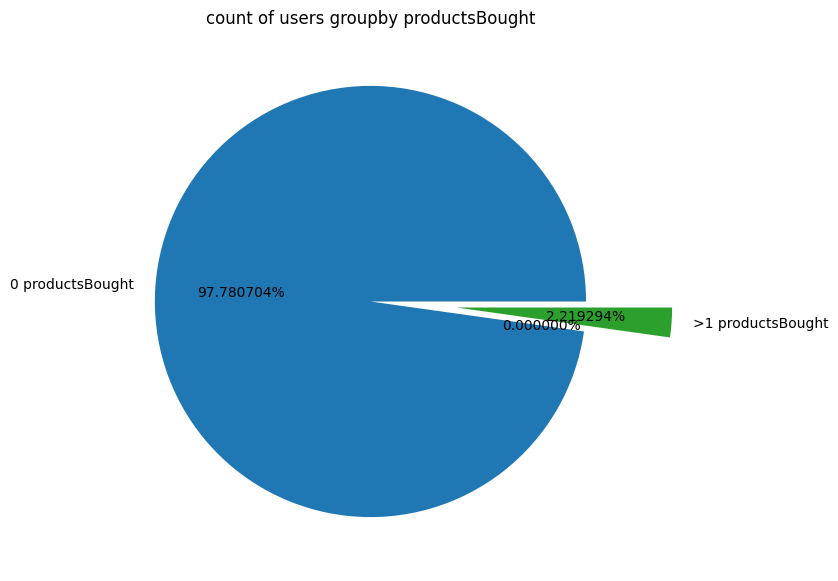

In [60]:
print(df['productsBought'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )
df_productsBought = pd.Series({
    '0 productsBought': df['productsBought'][df['productsBought'] == 0].count(),
    '1 productsBought': df['productsBought'][df['productsBought'] == 1].count(),
    '>1 productsBought': df['productsBought'][df['productsBought'] > 1].count()
    })
print(df_productsBought)
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsBought")
df_productsBought.plot.pie(labels= df_productsBought.index, autopct='%0f%%', explode=(0, 0.2, 0.4) )
plt.ylabel("")

count    98913.000000
mean         0.121592
std          2.126895
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max        174.000000
Name: productsSold, dtype: float64
0 productsSold     96877
1 productsSold       917
>1 productsSold     1119
dtype: int64


Text(0, 0.5, '')

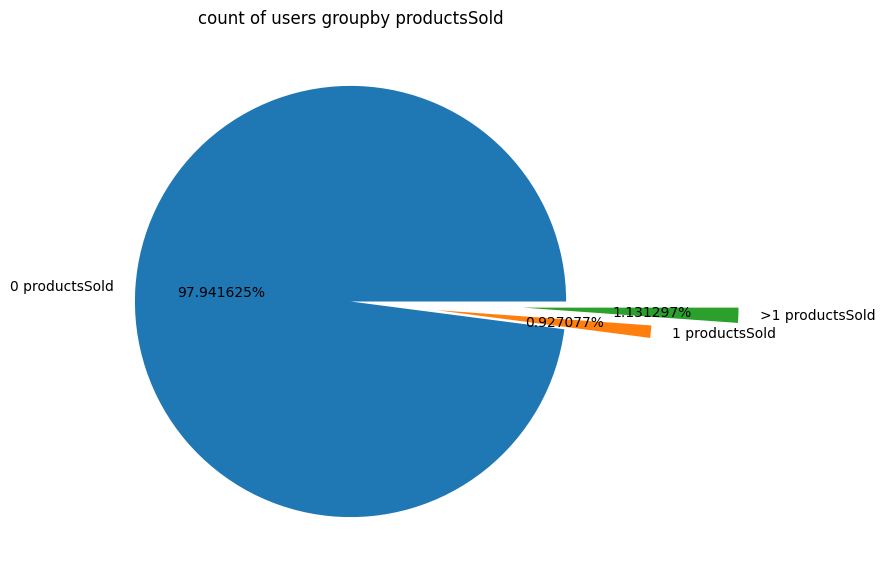

In [62]:
print(df['productsSold'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )
df_productsSold = pd.Series({
    '0 productsSold': df['productsSold'][df['productsSold'] == 0].count(),
    '1 productsSold': df['productsSold'][df['productsSold'] == 1].count(),
    '>1 productsSold': df['productsSold'][df['productsSold'] > 1].count()
    })
print(df_productsSold)
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsSold")
df_productsSold.plot.pie(labels= df_productsSold.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

non-active user            92020
active buyer                   0
highly active buyer         1751
active seller                683
highly active seller         791
multiple identity users      562
dtype: int64

sum of count: 95807


Text(0, 0.5, '')

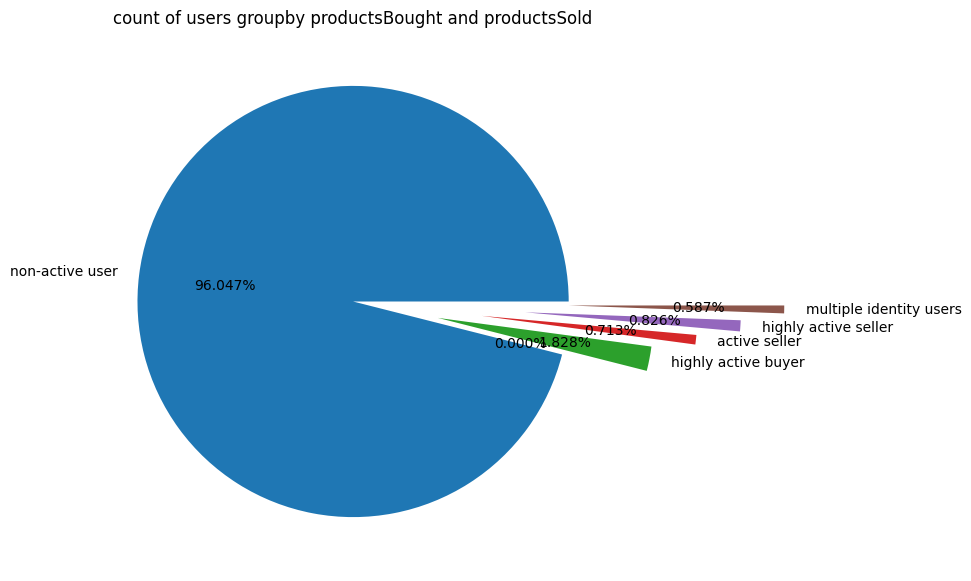

In [64]:
df_productsBoughtAndSold = pd.Series({
    'non-active user': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] == 0) ].count(),
    'active buyer': df['productsWished'][(df['productsBought'] == 1) & (df['productsSold'] == 0) ].count(),
    'highly active buyer': df['productsWished'][(df['productsBought'] > 1) & (df['productsSold'] == 0)].count(),
    'active seller': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] == 1)].count(),
    'highly active seller': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] > 1)].count(),
    'multiple identity users': df['productsWished'][(df['productsBought'] > 0) & (df['productsSold'] > 0)].count()
    })
print(df_productsBoughtAndSold )
print(f'\nsum of count: {df_productsBoughtAndSold.sum()}' )
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsBought and productsSold")
df_productsBoughtAndSold.plot.pie(autopct='%0.3f%%', explode=[x/5 for x in range(0, len(df_productsBoughtAndSold), 1) ] )
plt.ylabel("")

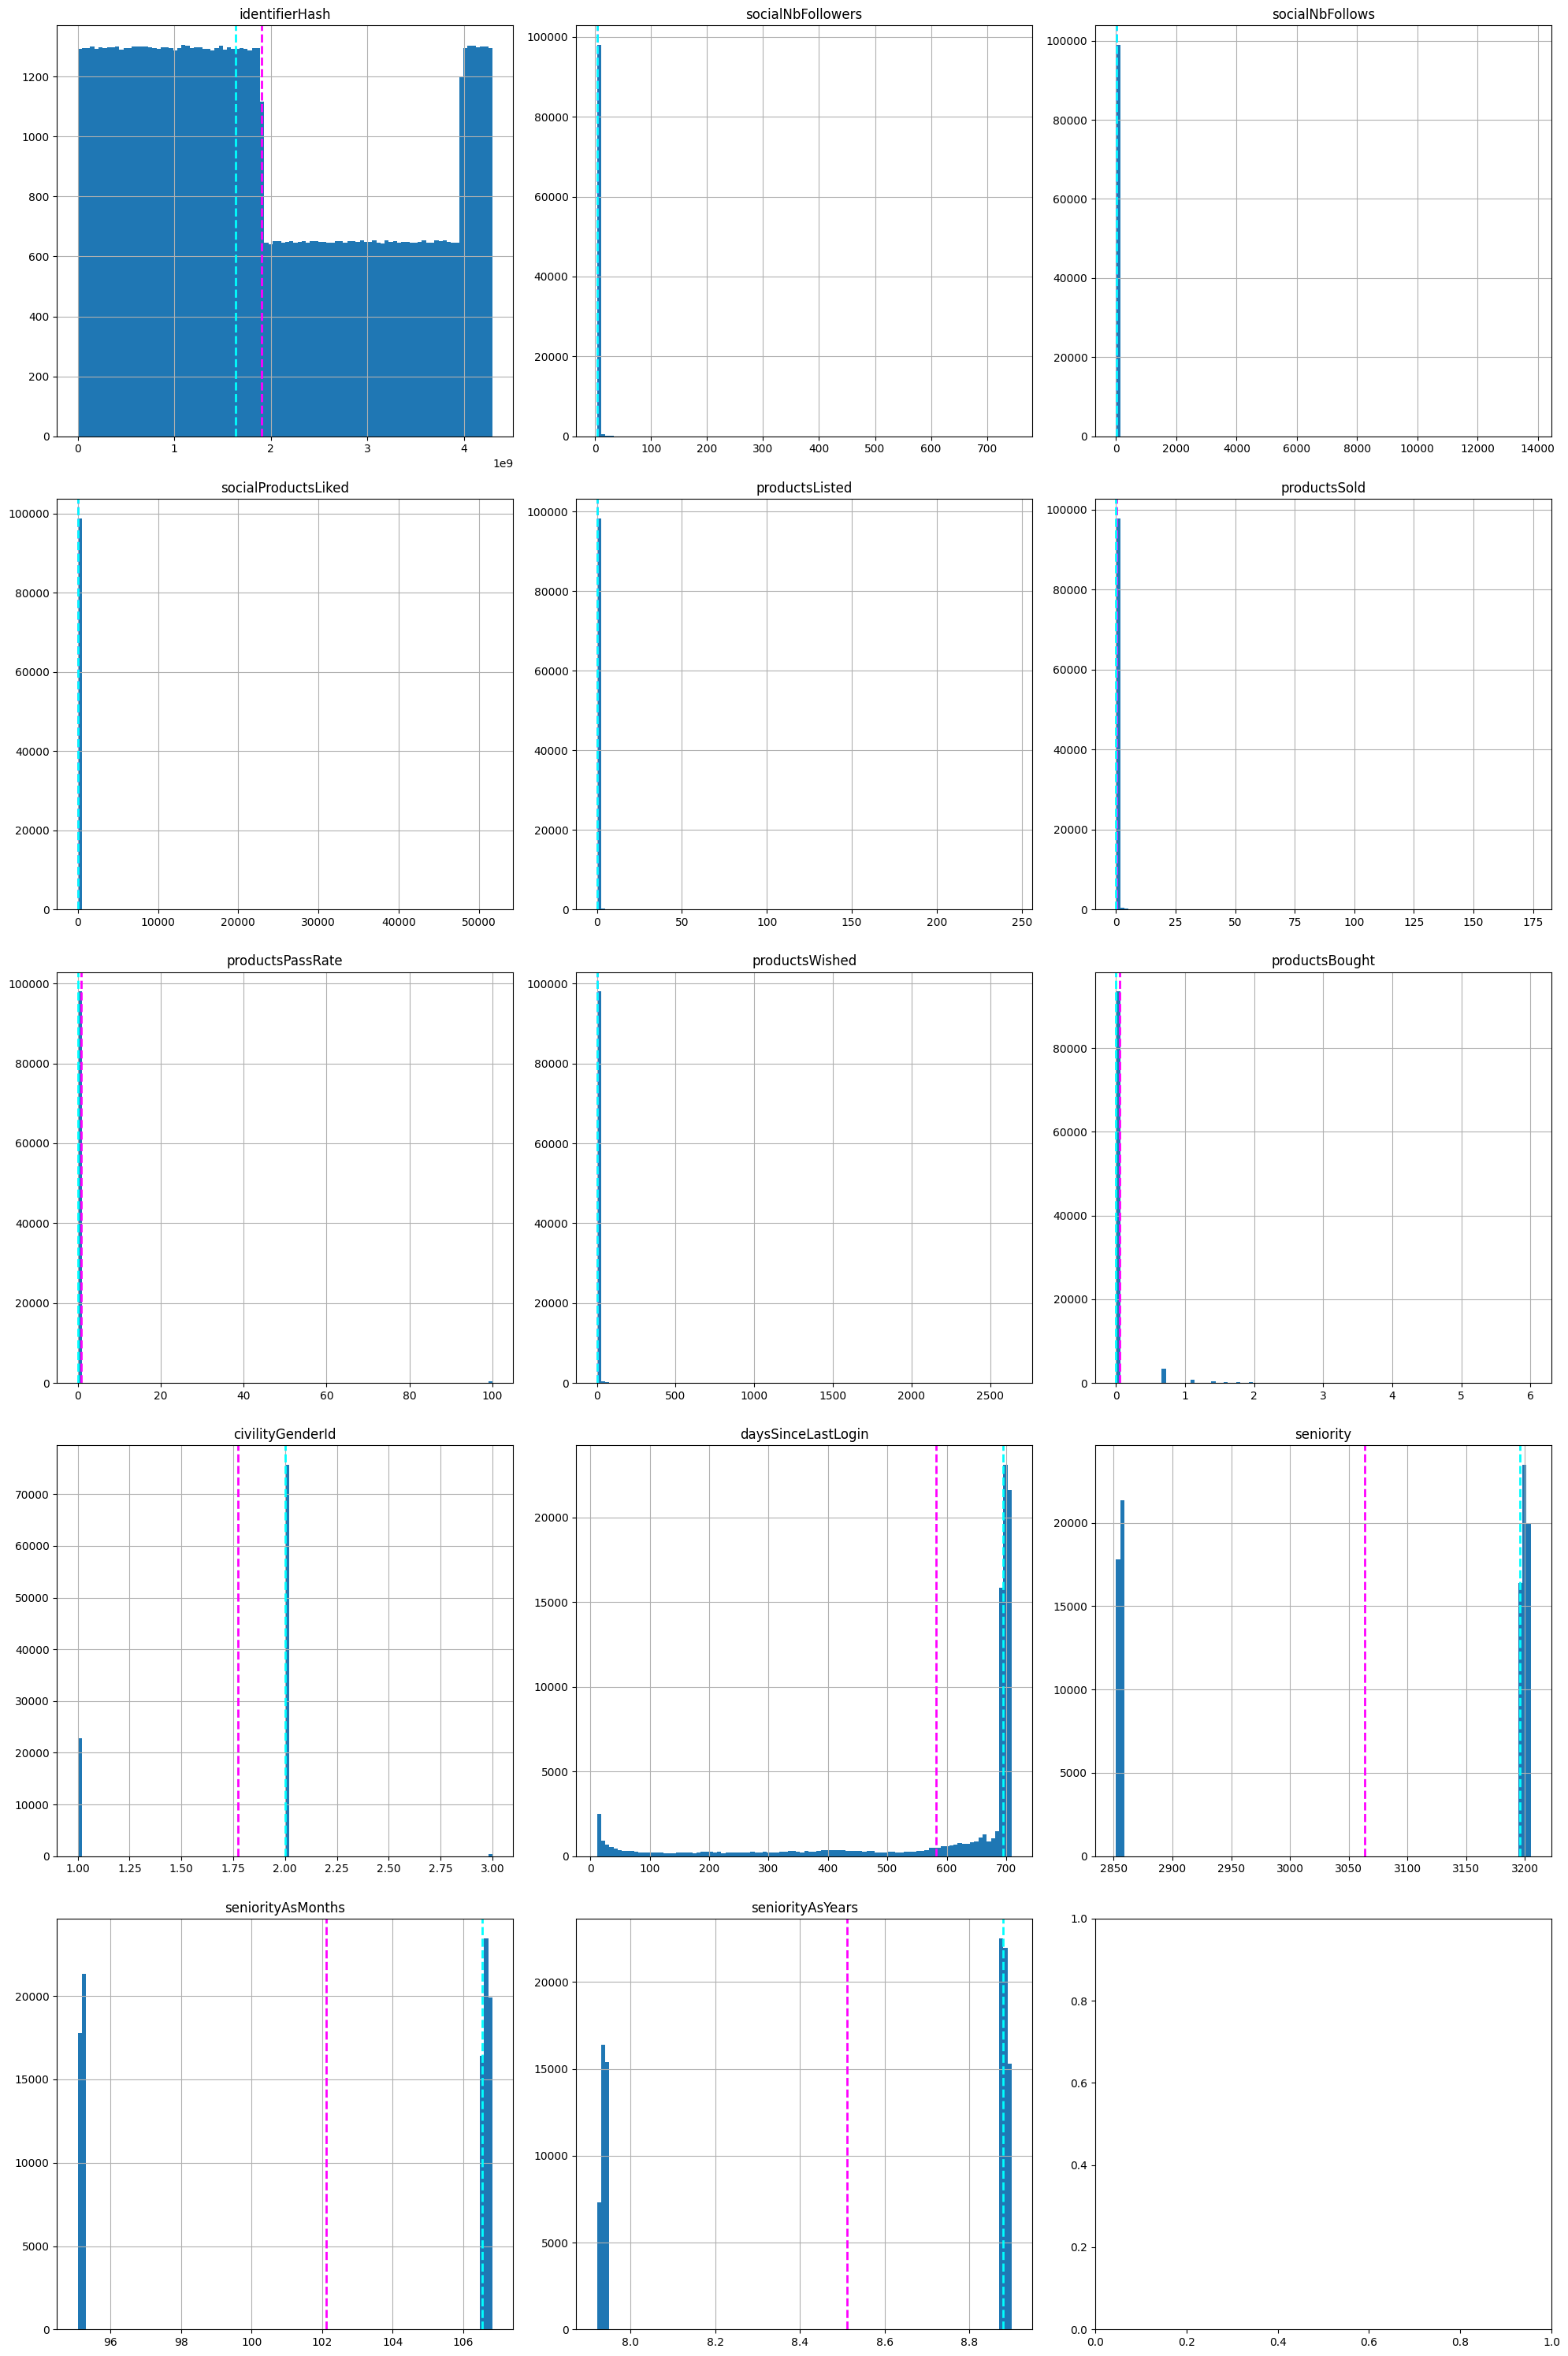

In [66]:
# Determine the number of rows and columns needed for the subplots
n_cols = 3  # Number of columns (you can adjust this based on your preference)
n_rows = (len(df.select_dtypes(include="number").columns) + n_cols - 1) // n_cols  # Calculate number of rows

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))  # Adjust the figsize as needed

# Flatten the axes to make it easy to iterate over
axes = axes.flatten()

# Loop through numeric columns in the DataFrame
for i, col in enumerate(df.select_dtypes(include="number").columns):
    if col == "MeasureDesc":
        continue
    
    # Select the axis for the current plot
    ax = axes[i]
    
    # Plot the histogram for the column
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    
    # Add vertical lines for mean and median
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    
    # Set the title for the subplot
    ax.set_title(col)

# Adjust layout to make sure plots don't overlap
plt.tight_layout()

# Show all the plots at once
plt.show()

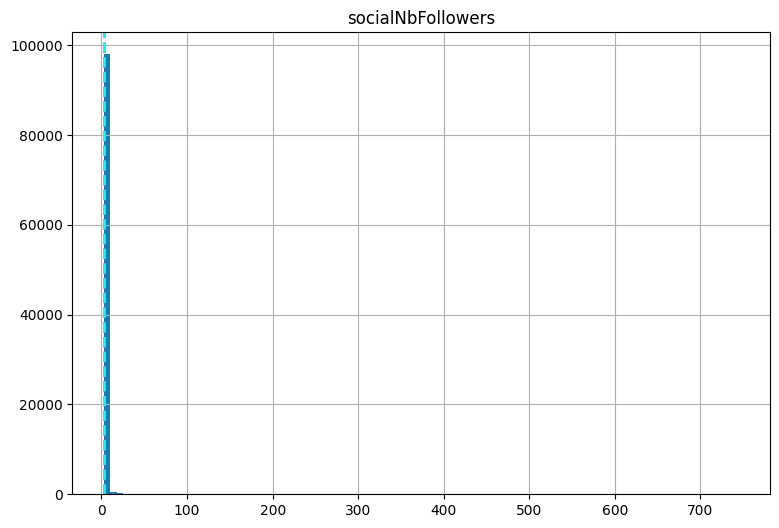

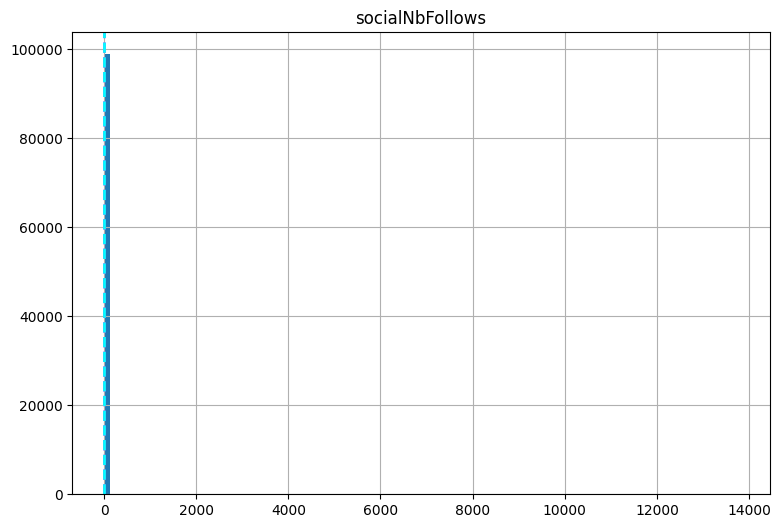

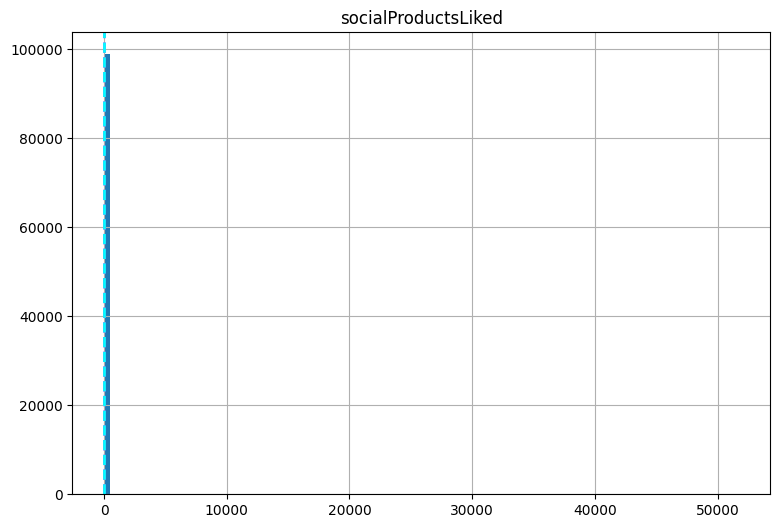

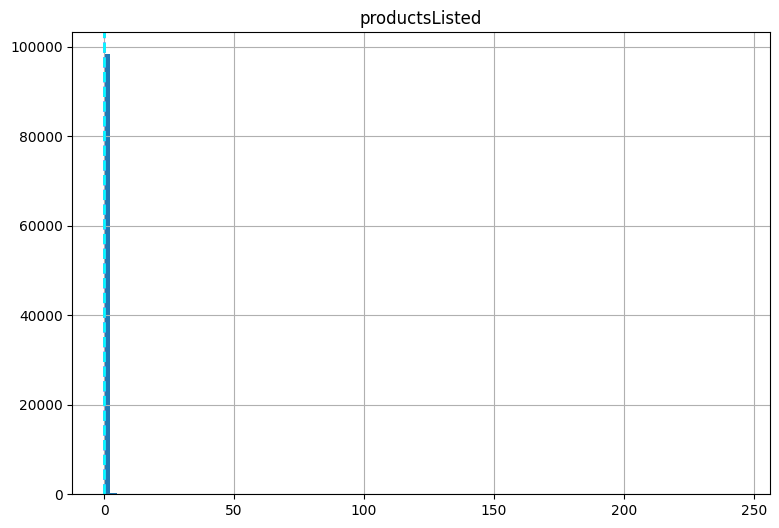

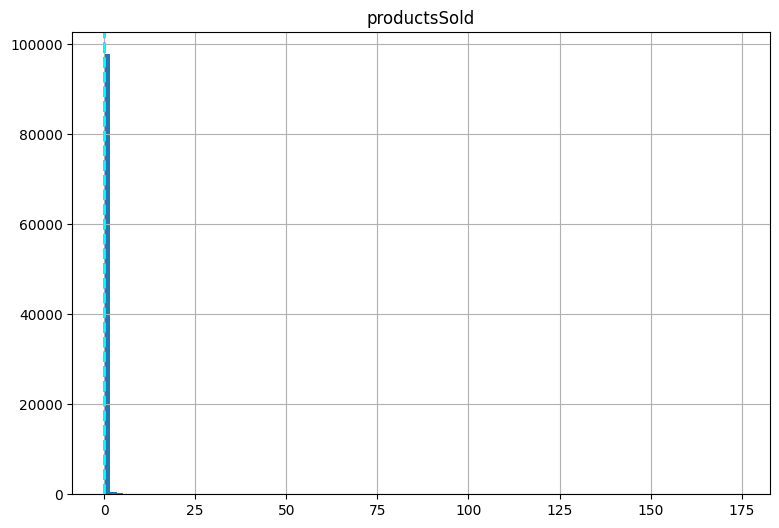

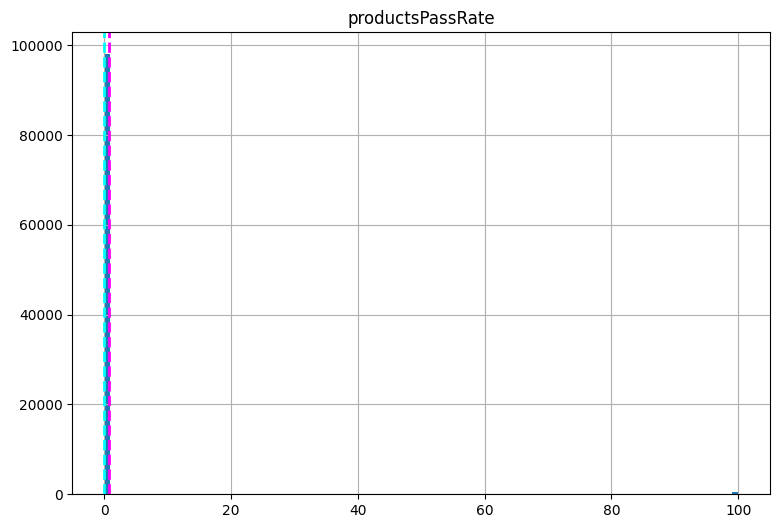

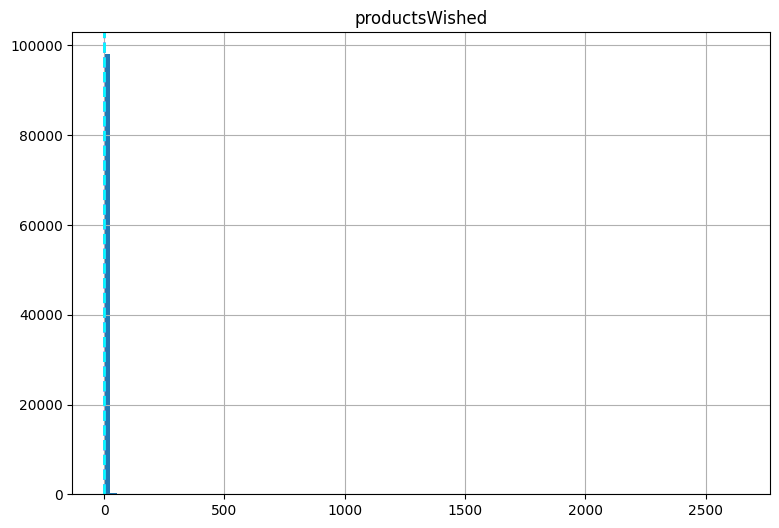

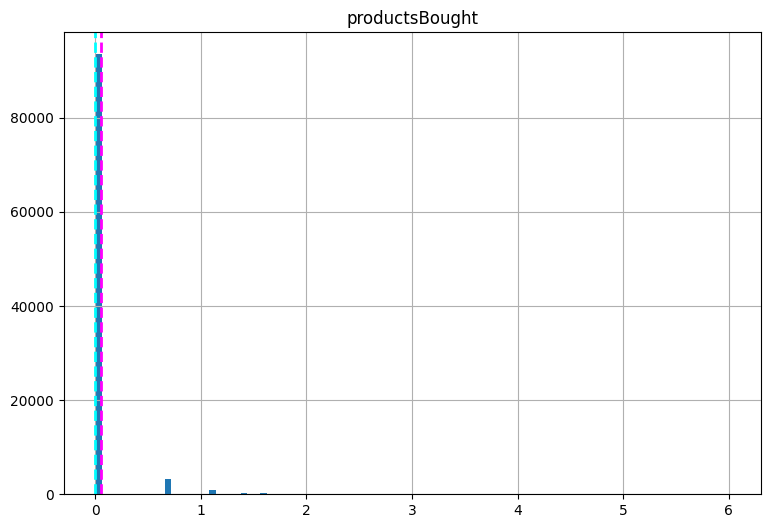

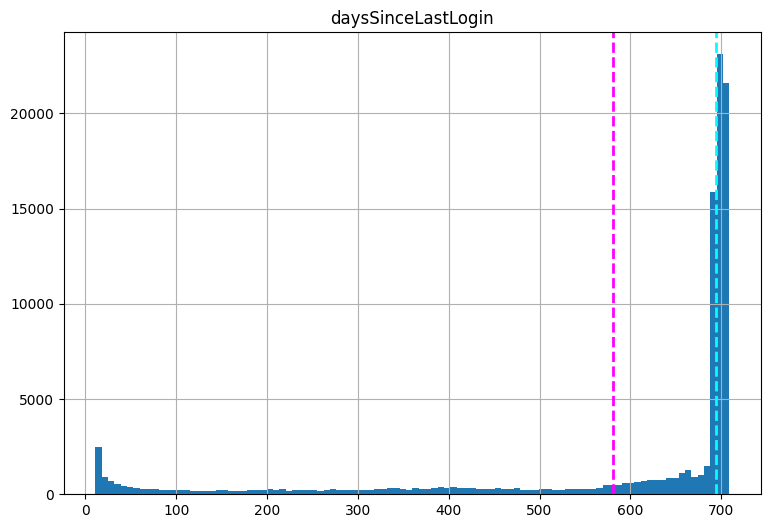

In [68]:
numeric_cols = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']
for col in numeric_cols[:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = (df[col])
    feature.hist(bins=100, ax = ax)
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()
     

###  Applying Log Transformation to Skewed Data

In [71]:
# Calculate skewness for numerical columns
numeric_cols = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']
skewness = df[numeric_cols].apply(skew)
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 socialNbFollowers       88.815563
socialNbFollows        220.873329
socialProductsLiked    244.154040
productsListed          64.892234
productsSold            41.595002
productsPassRate        10.667137
productsWished          49.256212
productsBought           6.728616
daysSinceLastLogin      -1.675400
seniority               -0.427083
dtype: float64


In [73]:
# Apply log transformation to columns with high skewness
skewed_cols = skewness[skewness > 1].index  # Filter columns with skewness > 1
for col in skewed_cols:
    df[col] = np.log1p(df[col])  # Using log1p to handle zero values

In [75]:
#  Identify Highly Skewed Columns
# Filter columns with skewness > 1
highly_skewed_cols = skewness[skewness > 1].index
print("Highly skewed columns:\n", highly_skewed_cols)

#  Apply Log Transformation
# Use np.log1p to handle zero values (log1p(x) = log(1 + x))
for col in highly_skewed_cols:
    df[col] = np.log1p(df[col])  # Log transform

#  Verify the Skewness After Transformation
# Recalculate skewness
new_skewness = df[highly_skewed_cols].skew()
print("Skewness after log transformation:\n", new_skewness)


Highly skewed columns:
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought'],
      dtype='object')
Skewness after log transformation:
 socialNbFollowers       5.030250
socialNbFollows       -13.112996
socialProductsLiked     2.584605
productsListed          9.129779
productsSold            8.397687
productsPassRate       10.157322
productsWished          3.695261
productsBought          4.428525
dtype: float64


In [77]:
# Recalculate skewness to confirm reduction
skewness_after = df[skewed_cols].apply(skew)
print("Skewness after log transformation:\n", skewness_after)

Skewness after log transformation:
 socialNbFollowers       5.030173
socialNbFollows       -13.112797
socialProductsLiked     2.584565
productsListed          9.129640
productsSold            8.397560
productsPassRate       10.157168
productsWished          3.695205
productsBought          4.428457
dtype: float64


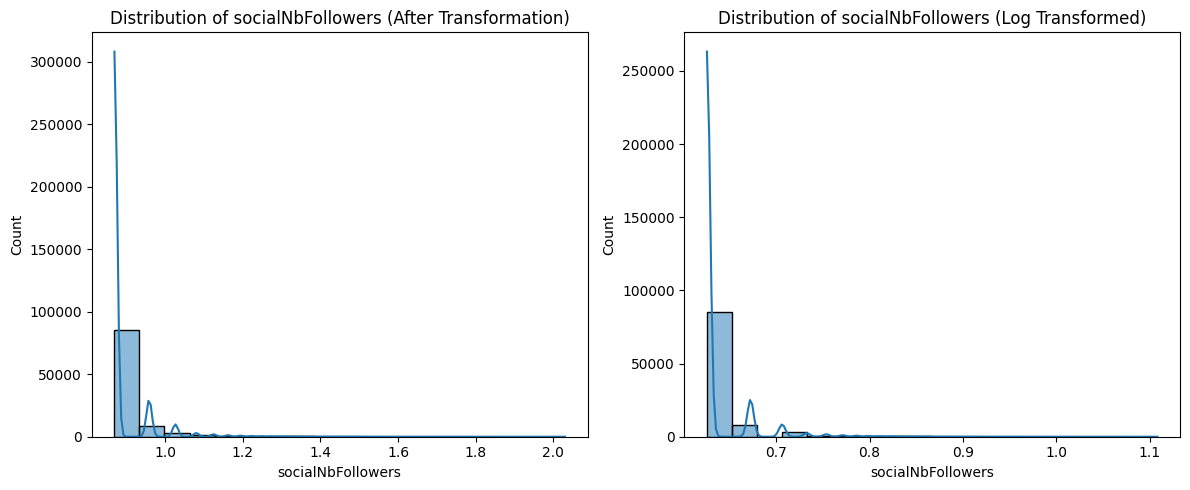

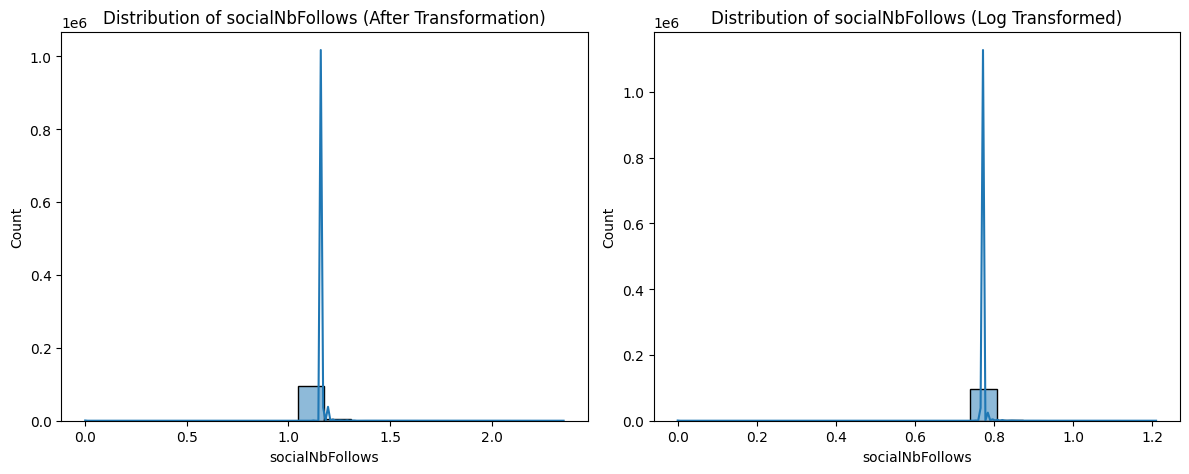

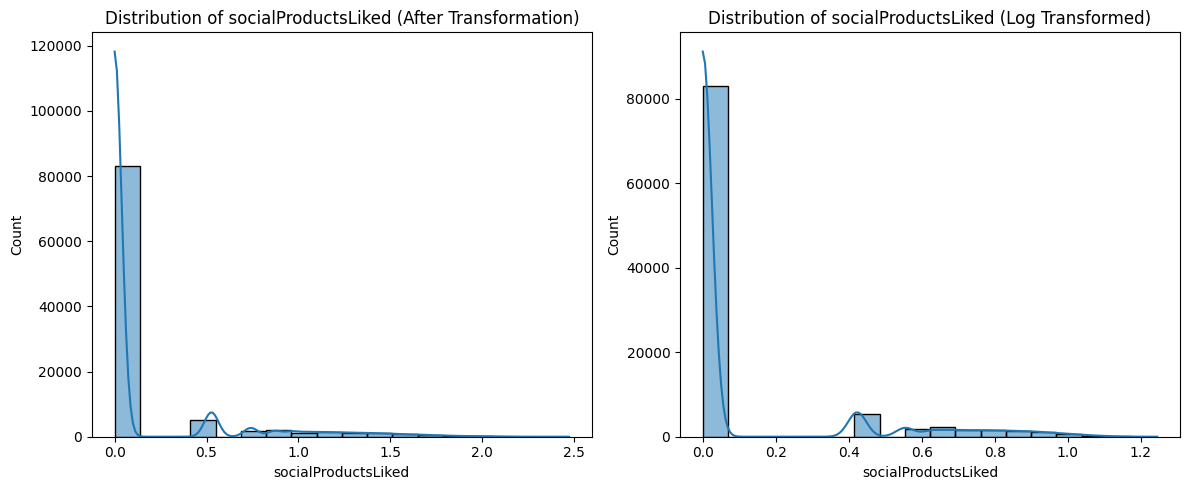

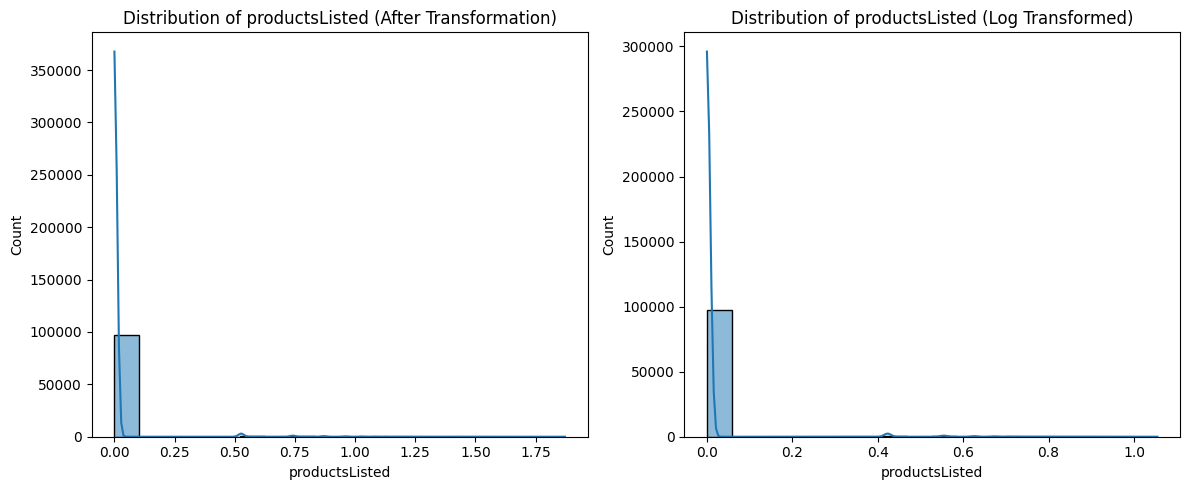

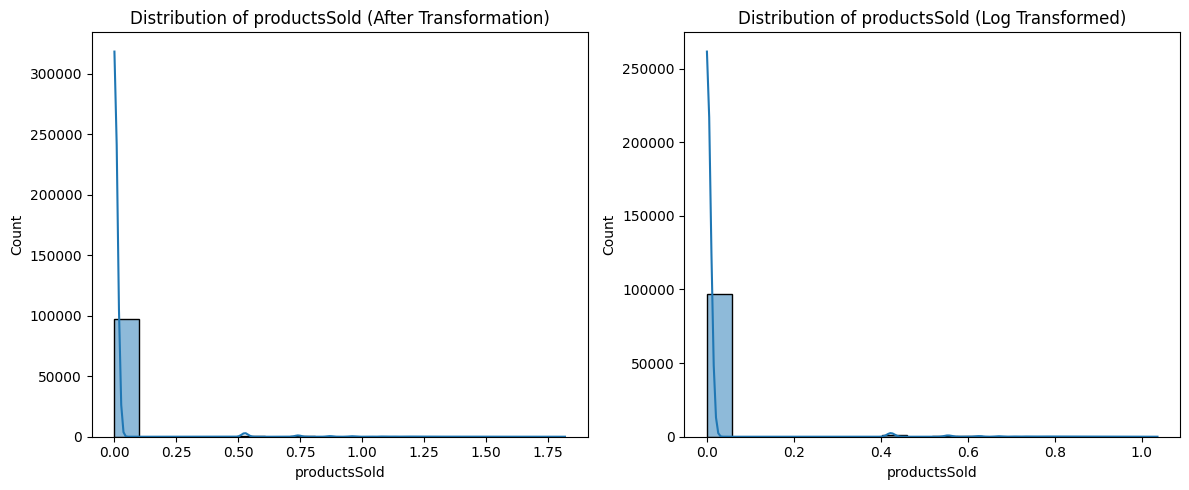

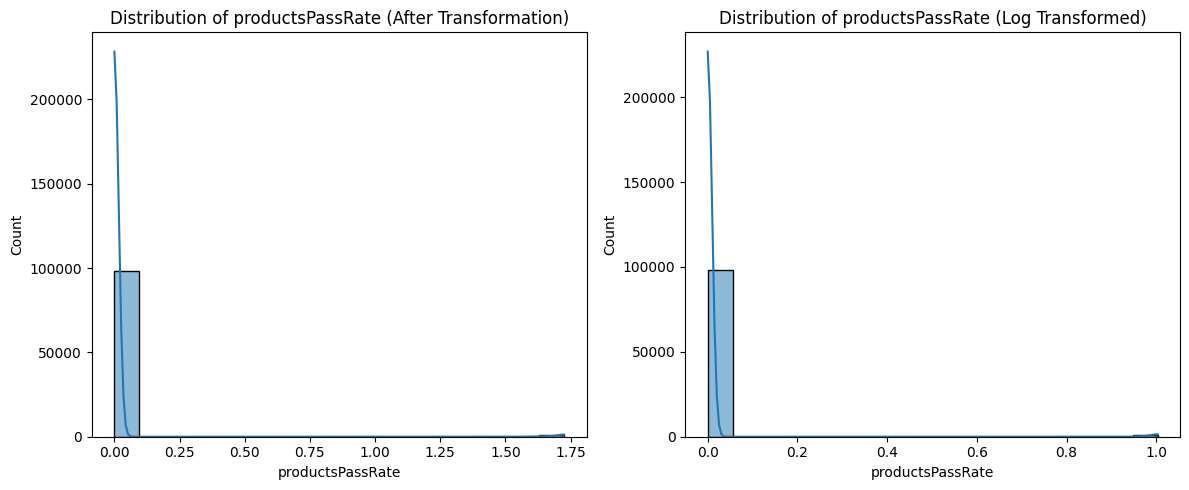

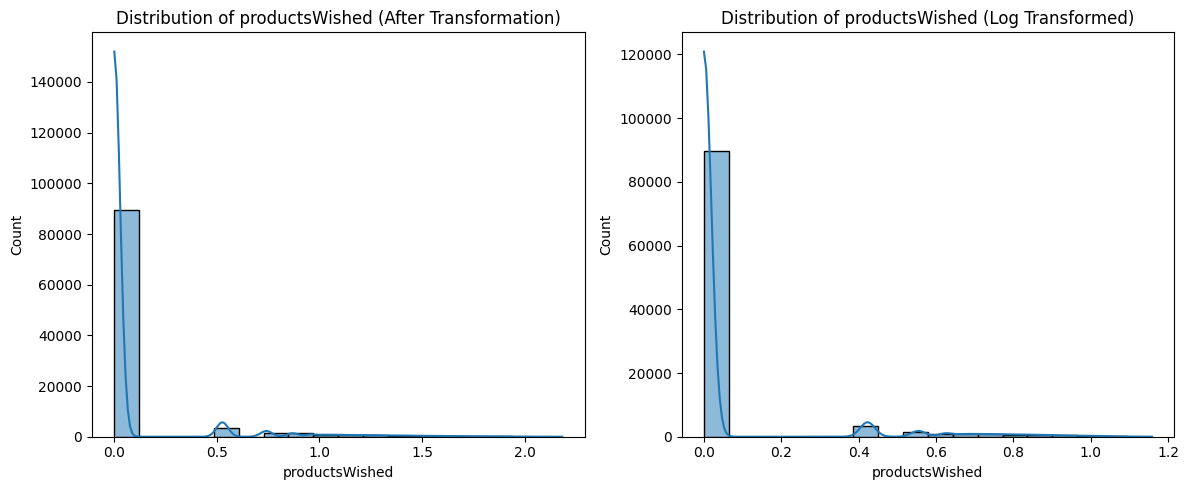

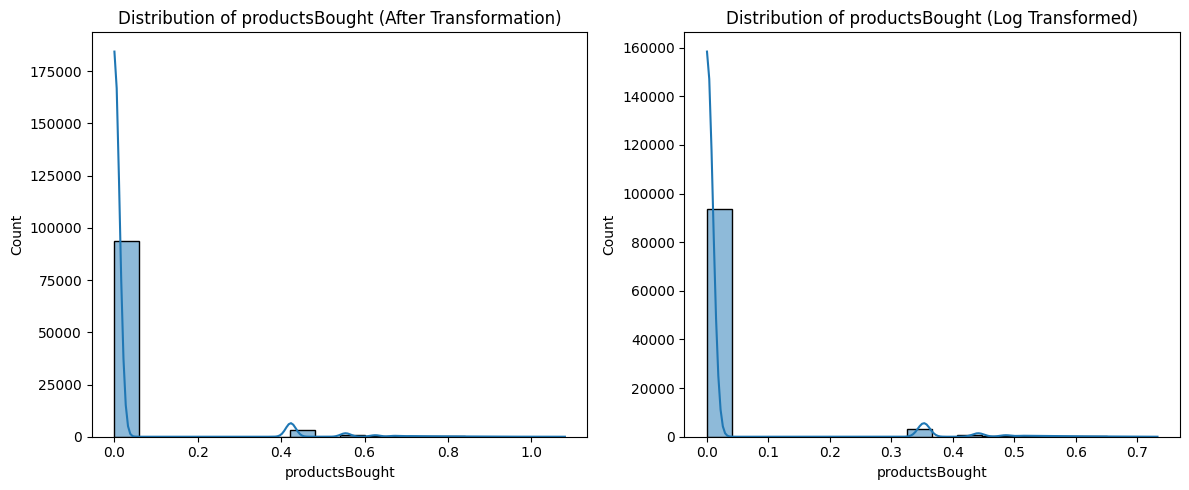

In [79]:
# Visualize Distributions Before and After Transformation
for col in highly_skewed_cols:
    plt.figure(figsize=(12, 5))
    
    # Before Transformation
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} (After Transformation)")
    
    # After Transformation
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True)
    plt.title(f"Distribution of {col} (Log Transformed)")
    
    plt.tight_layout()
    plt.show()

In [81]:
df['productsBought'] = np.log1p(df['productsBought'])

In [83]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
#  Check Skewness Before Transformation
skewness = df[numeric_cols].apply(skew)
print("Skewness before Box-Cox transformation:\n", skewness)

Skewness before Box-Cox transformation:
 identifierHash          0.387409
socialNbFollowers       5.030173
socialNbFollows       -13.112797
socialProductsLiked     2.584565
productsListed          9.129640
productsSold            8.397560
productsPassRate       10.157168
productsWished          3.695205
productsBought          4.226033
civilityGenderId       -1.140803
daysSinceLastLogin     -1.675400
seniority              -0.427083
seniorityAsMonths      -0.427085
seniorityAsYears       -0.427305
dtype: float64


In [85]:
#Apply Box-Cox Transformation to Highly Skewed Features
# Box-Cox only works on positive values, so ensure no zeros/negatives
for col in numeric_cols:
    if skewness[col] > 1:  # Apply only to highly skewed features
        # Ensure data is strictly positive
        min_value = df[col].min()
        if min_value <= 0:
            df[col] += abs(min_value) + 1  # Shift to make all values strictly positive
        
        # Apply Box-Cox Transformation
        df[col], _ = boxcox(df[col])

# Verify Skewness Reduction
skewness_after = df[numeric_cols].apply(skew)
print("Skewness after Box-Cox transformation:\n", skewness_after)

Skewness after Box-Cox transformation:
 identifierHash          0.387409
socialNbFollowers       2.060113
socialNbFollows       -13.112797
socialProductsLiked     1.844997
productsListed          7.375084
productsSold            6.753002
productsPassRate       10.144560
productsWished          2.781808
productsBought          3.912922
civilityGenderId       -1.140803
daysSinceLastLogin     -1.675400
seniority              -0.427083
seniorityAsMonths      -0.427085
seniorityAsYears       -0.427305
dtype: float64


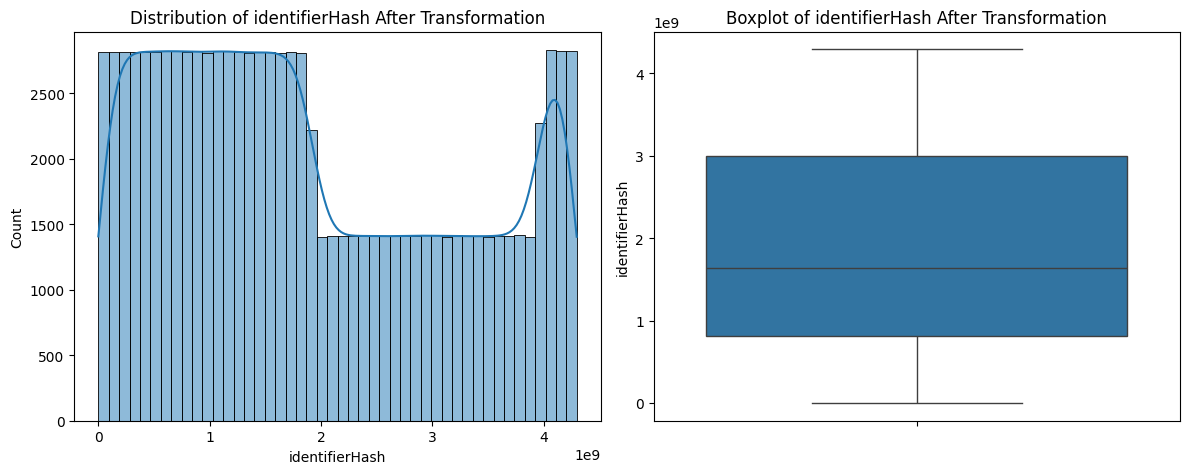

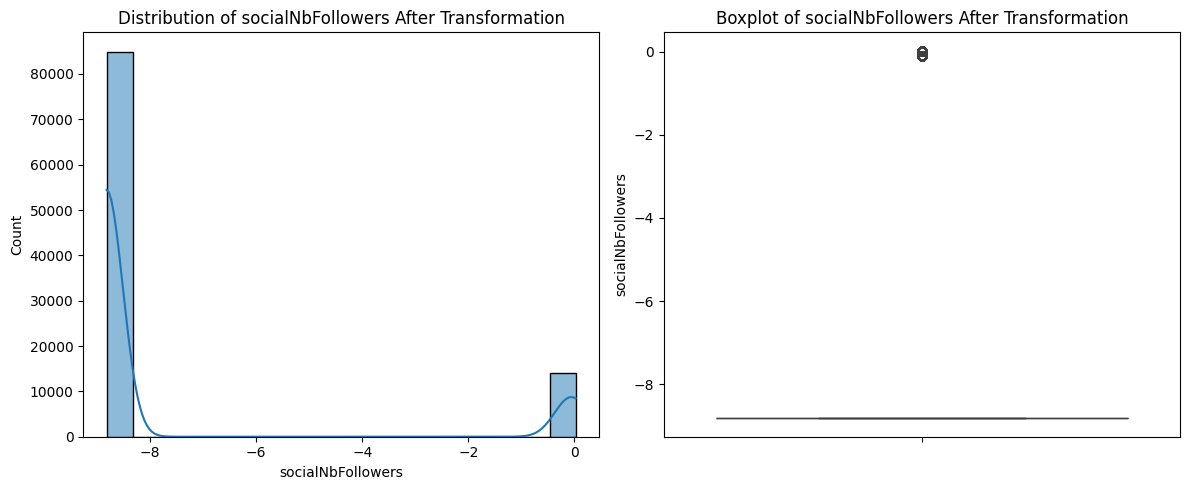

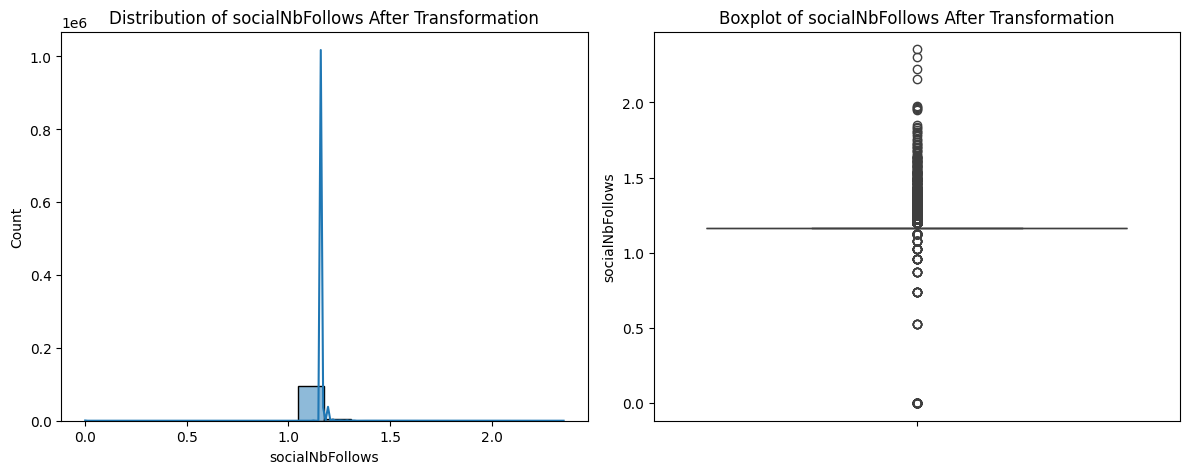

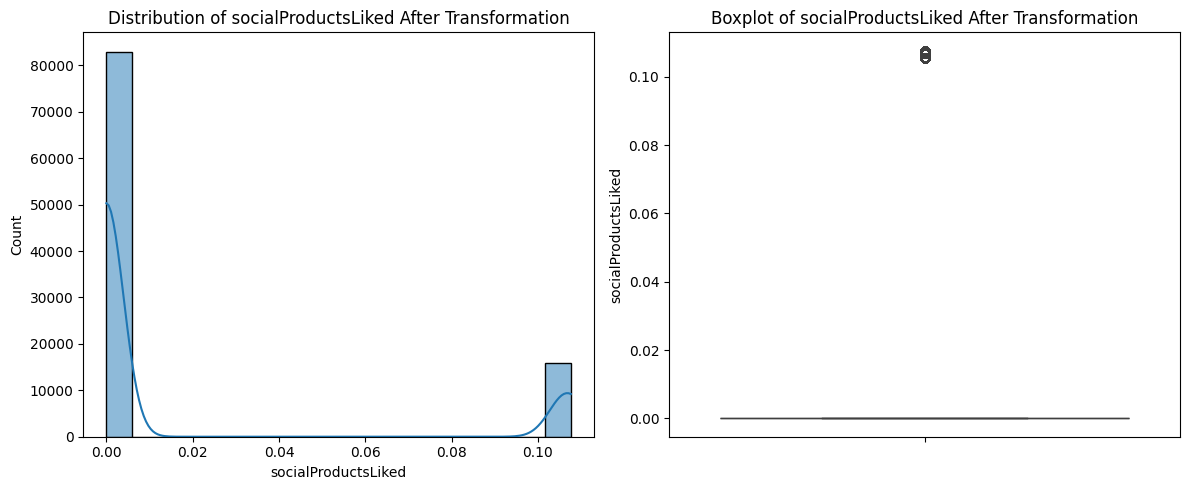

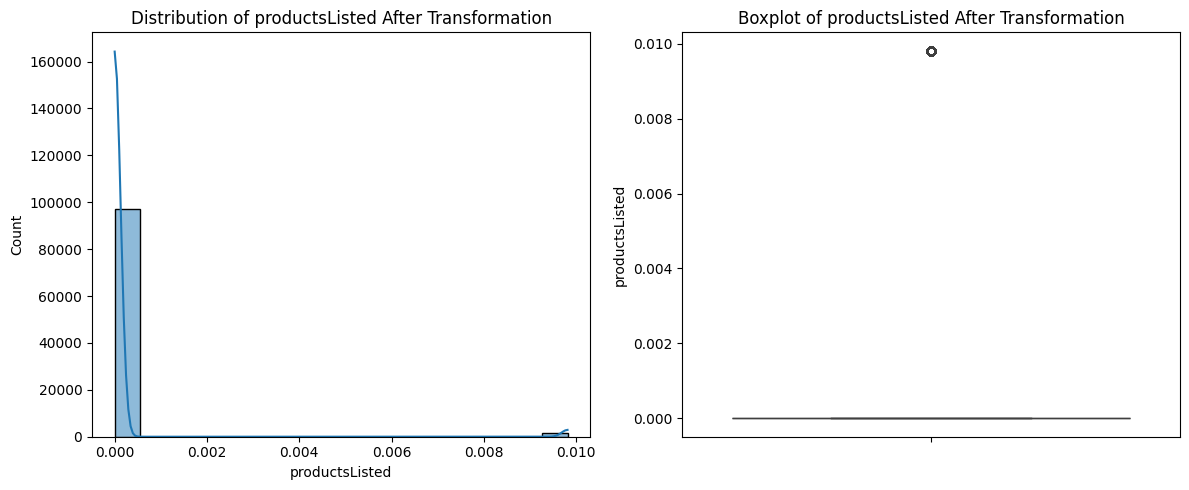

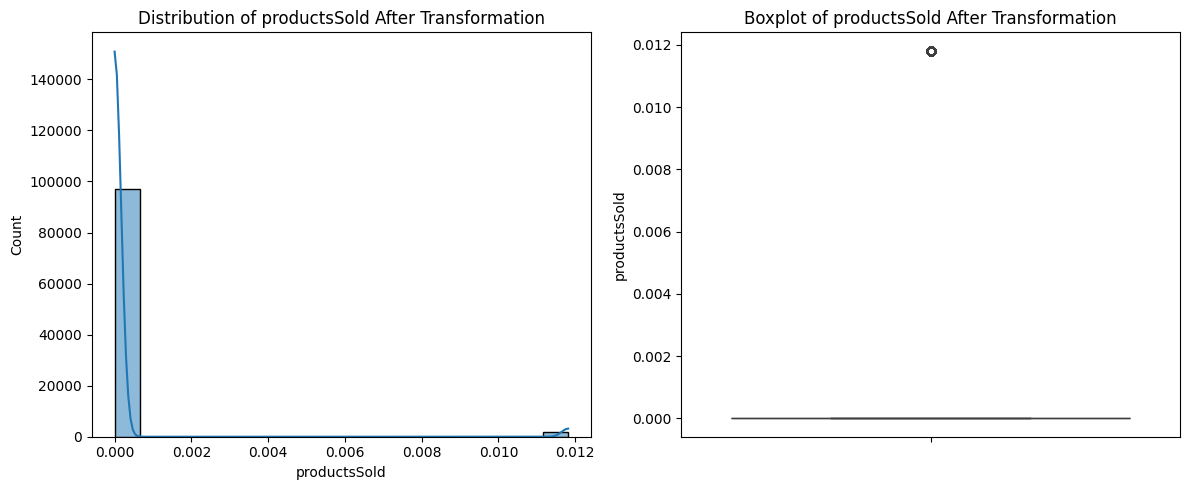

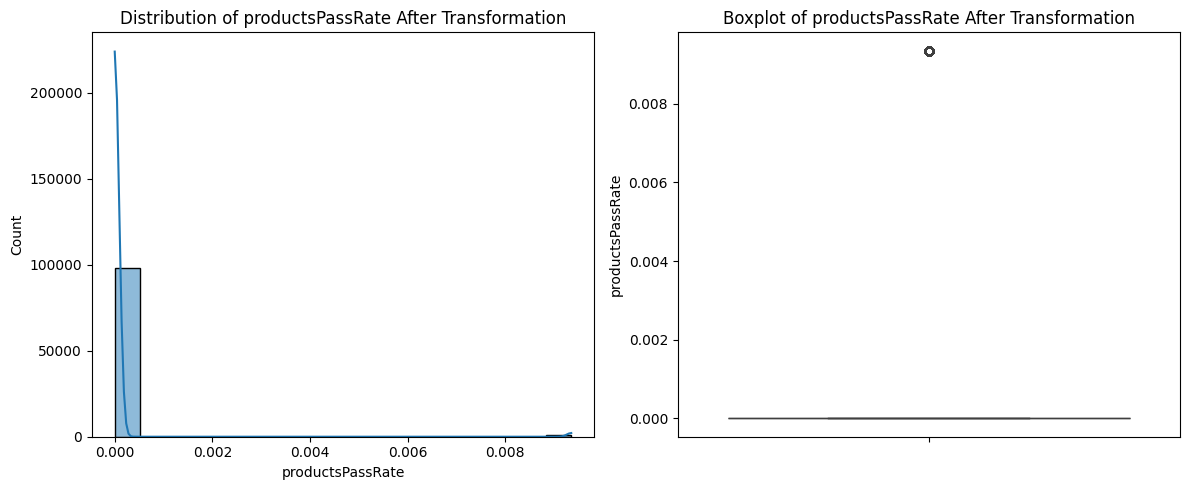

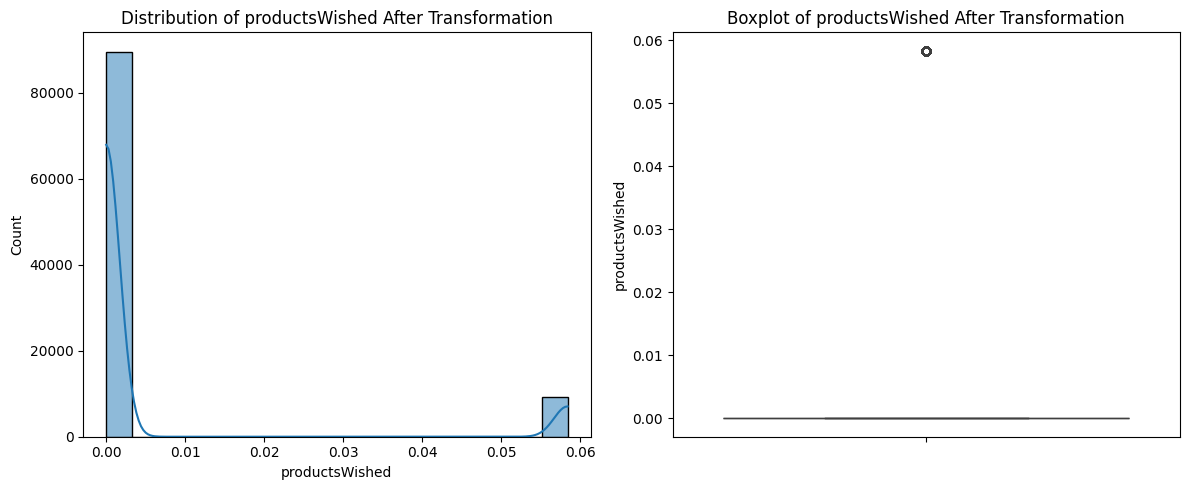

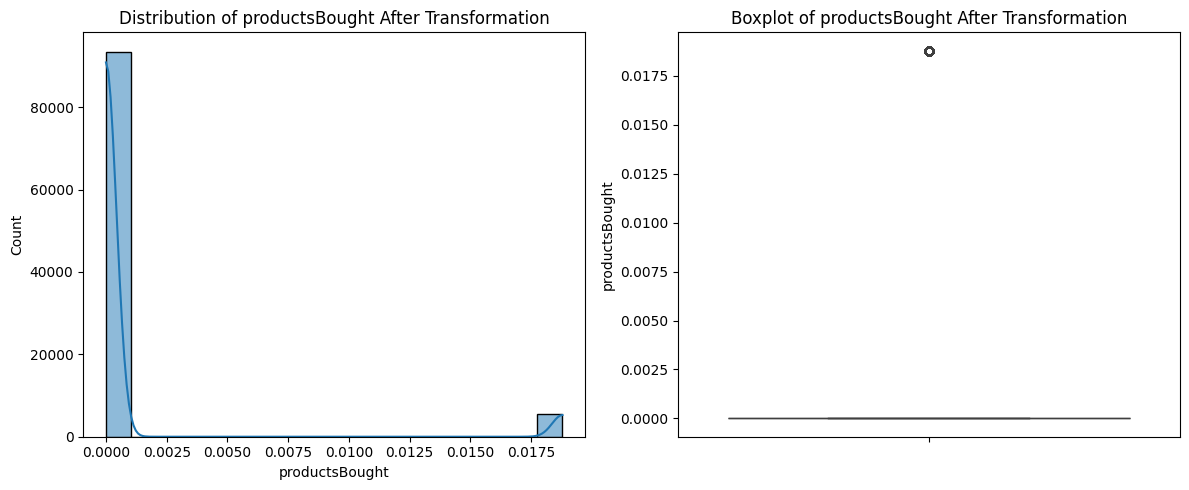

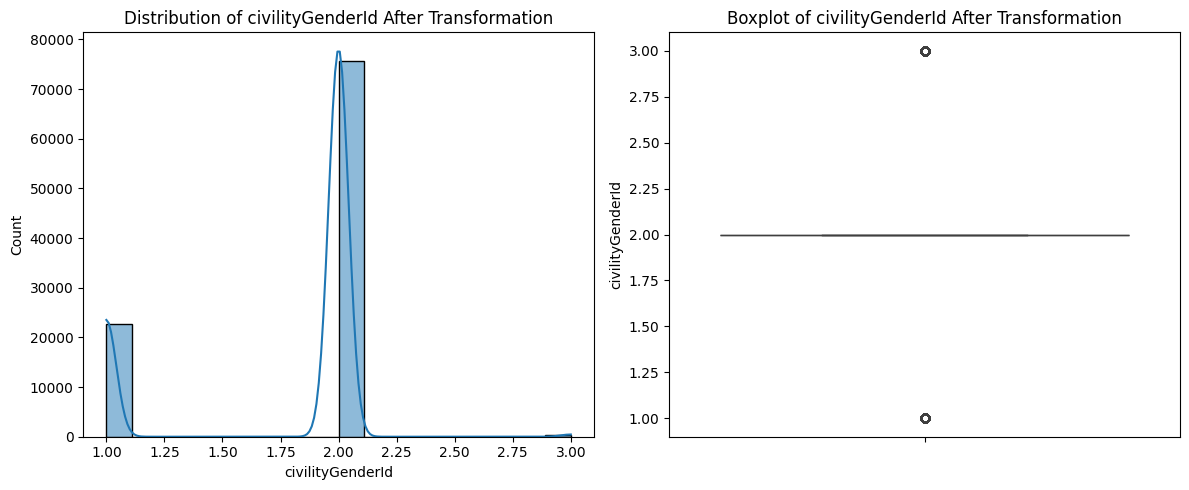

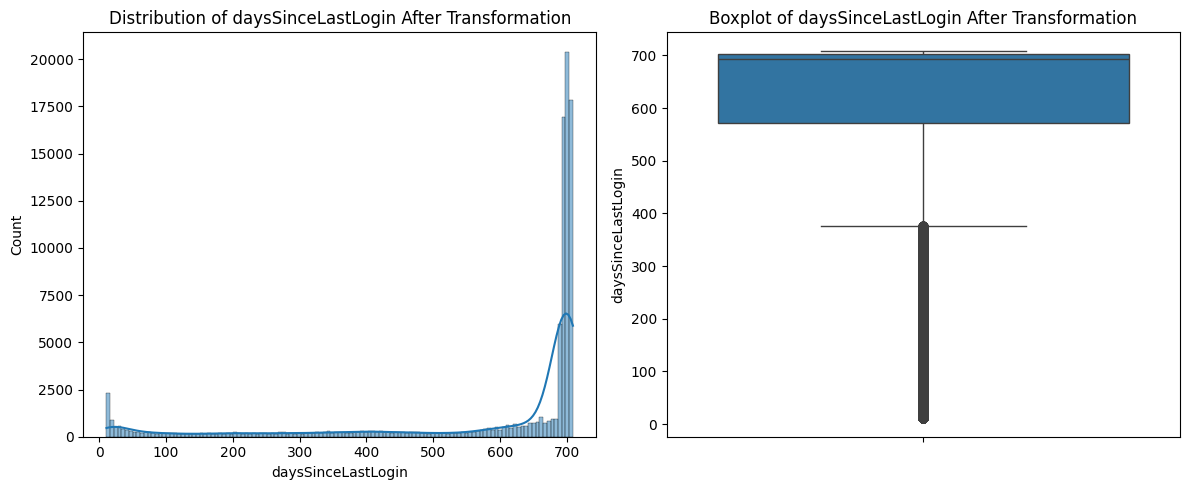

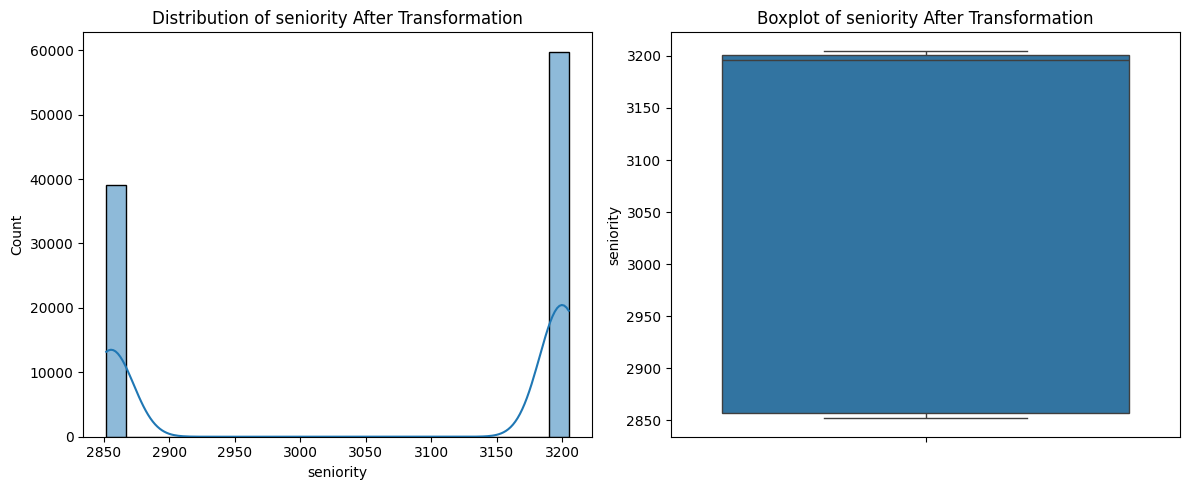

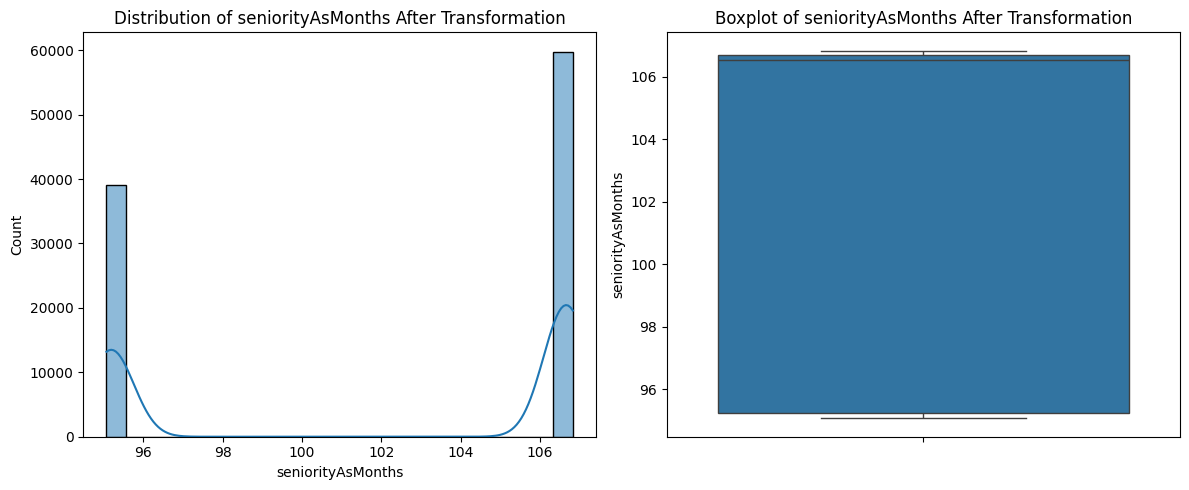

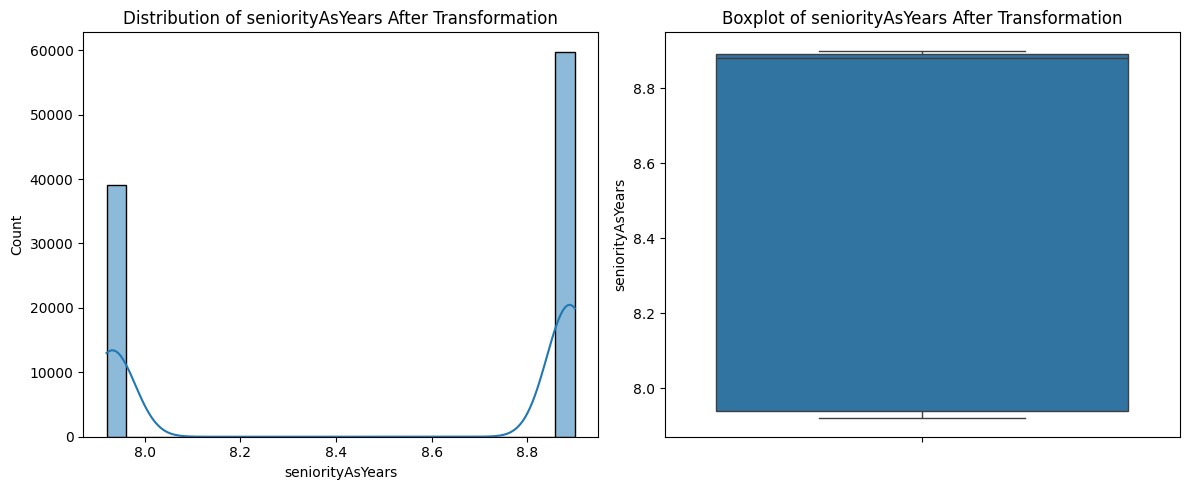

In [86]:
#  Visualize Distributions Before and After Transformation
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # After Transformation
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} After Transformation")
    
    # After Transformation Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col} After Transformation")
    
    plt.tight_layout()
    plt.show()


### Correlation Matrix

In [89]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation
correlation = numeric_df.corr()
print(correlation)

                     identifierHash  socialNbFollowers  socialNbFollows  \
identifierHash             1.000000          -0.144989        -0.006423   
socialNbFollowers         -0.144989           1.000000         0.122748   
socialNbFollows           -0.006423           0.122748         1.000000   
socialProductsLiked       -0.016373           0.229990         0.127891   
productsListed            -0.009675           0.252110         0.088447   
productsSold              -0.005513           0.302445         0.091732   
productsPassRate          -0.001080           0.232333         0.106885   
productsWished            -0.019283           0.210549         0.140643   
productsBought            -0.031717           0.288056         0.117503   
civilityGenderId          -0.002666           0.023729         0.005499   
daysSinceLastLogin         0.028541          -0.234645        -0.110111   
seniority                  0.485992          -0.051181        -0.003053   
seniorityAsMonths        

### Correlation Matrix Heatmap

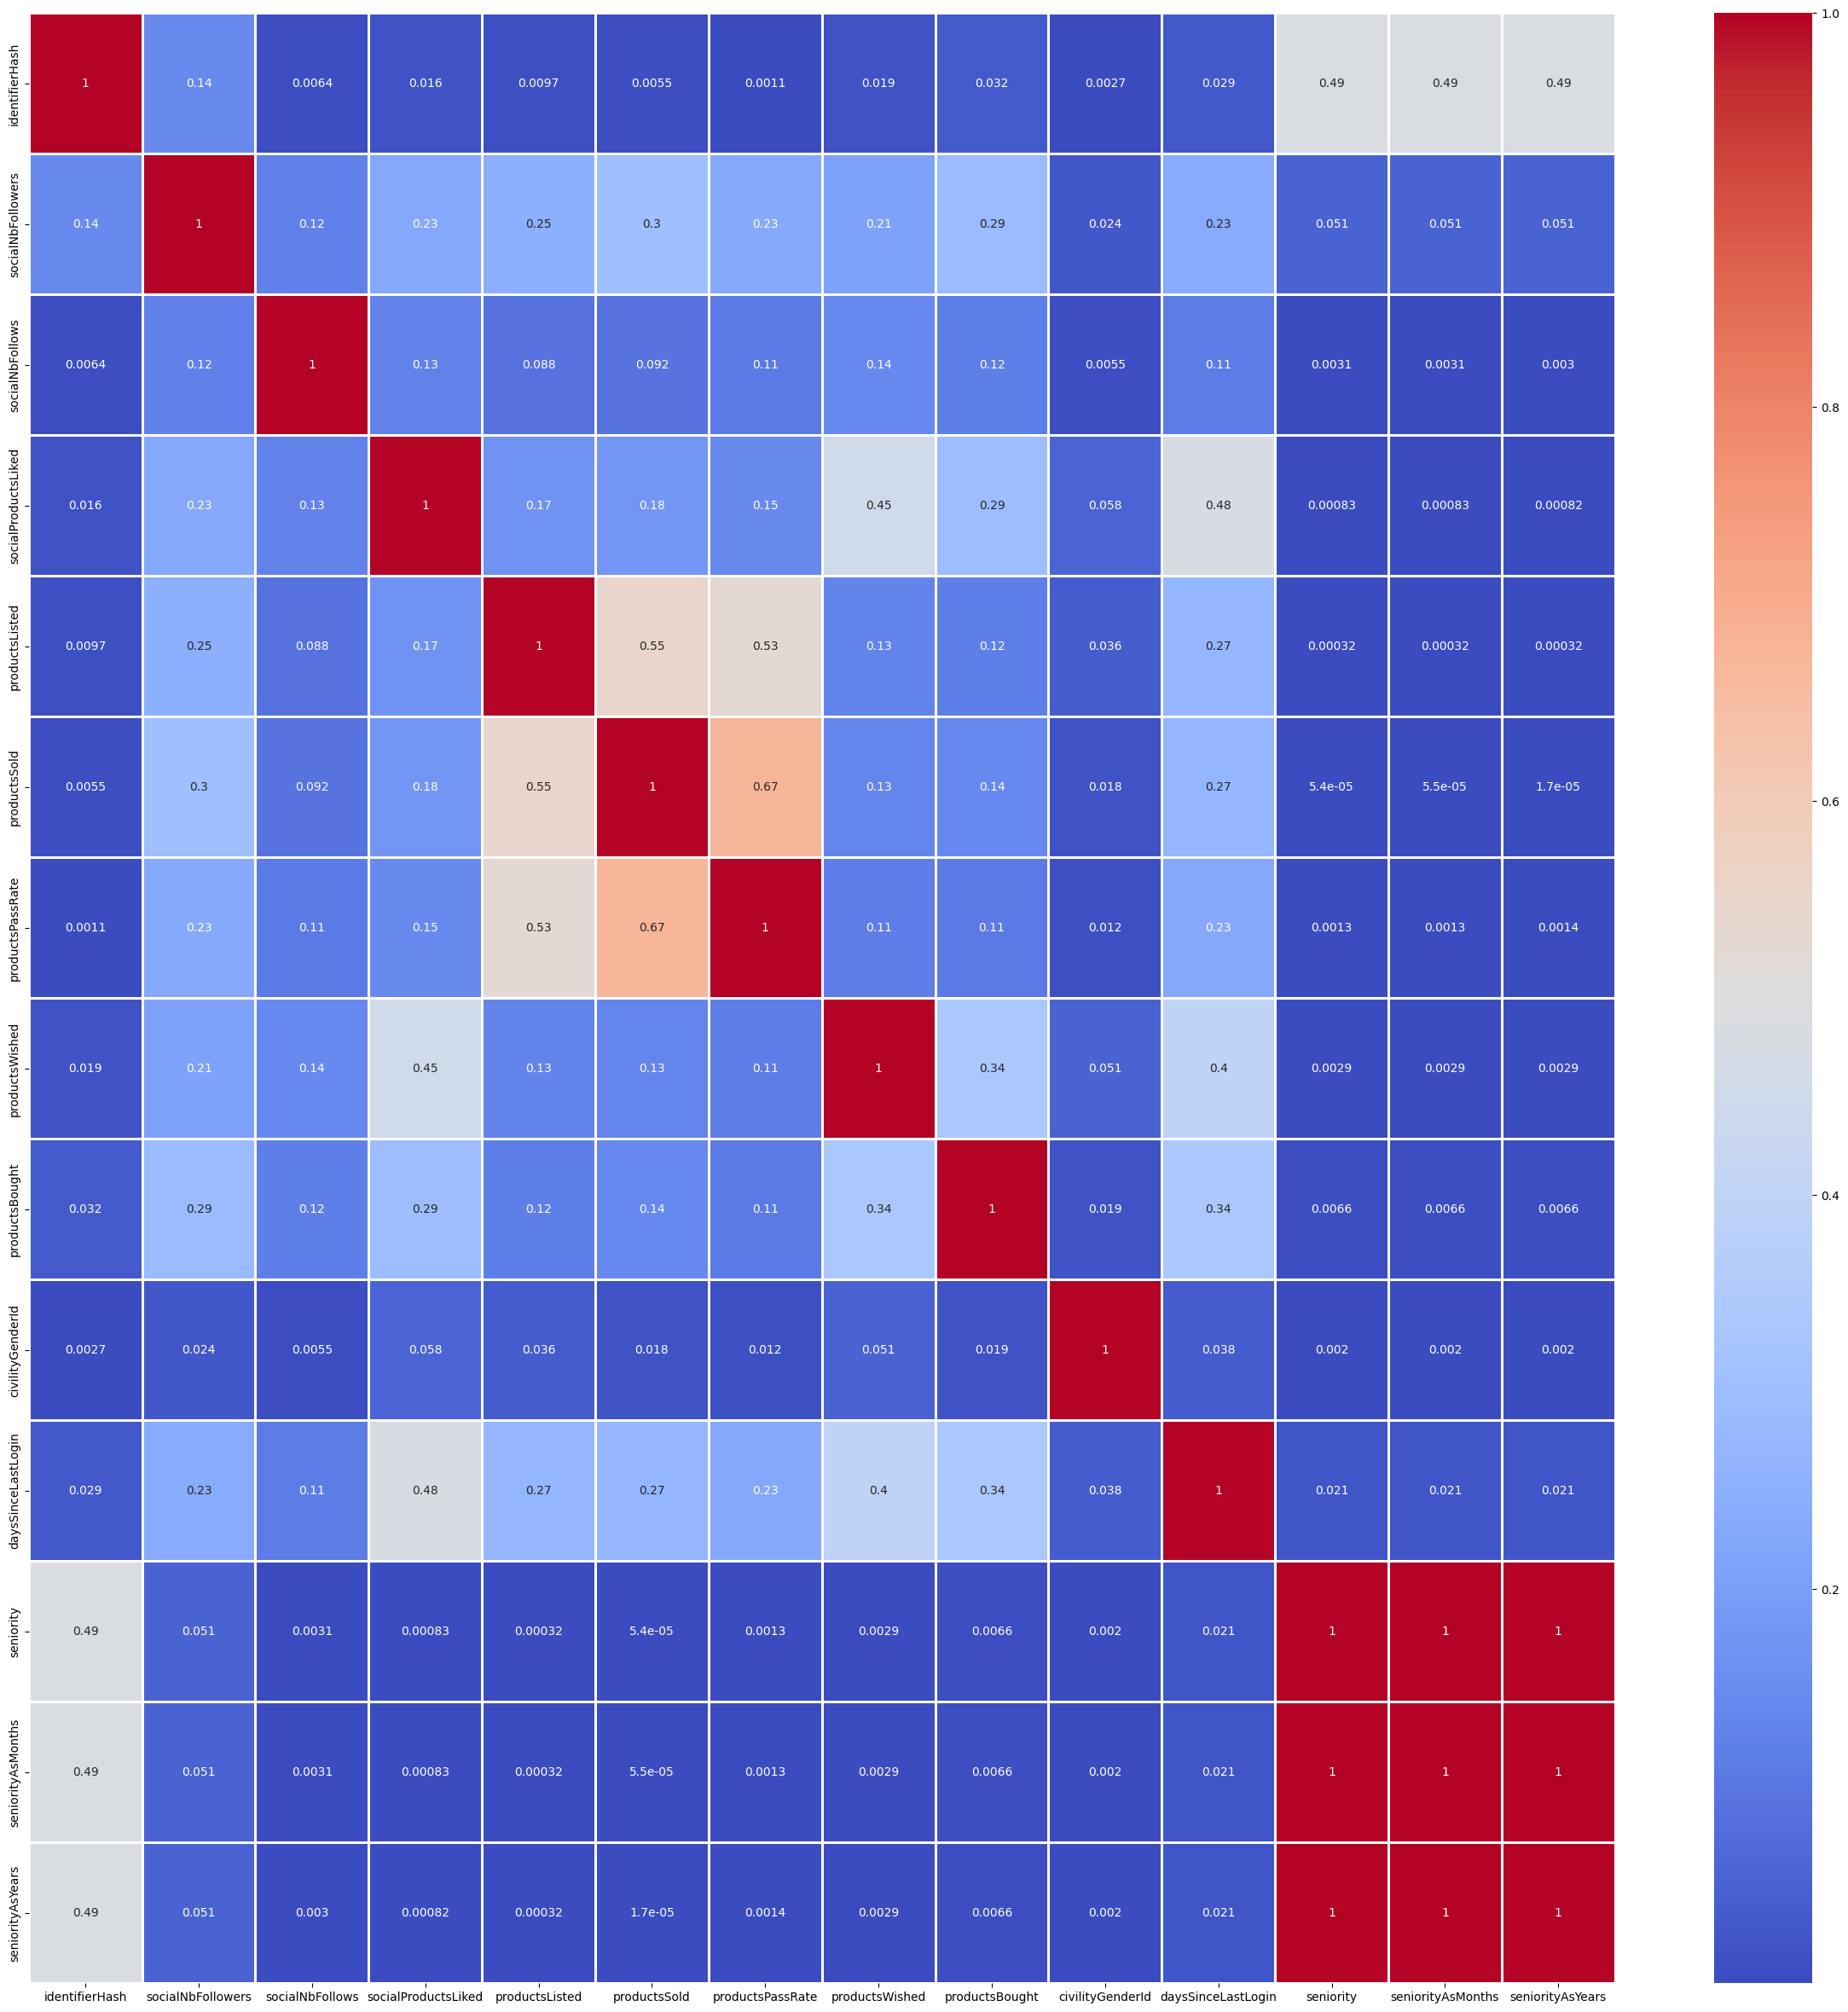

In [93]:
plt.figure(figsize=(30,30))
sns.heatmap(abs(correlation) ,annot =True , cmap = 'coolwarm', linewidth = 1)
plt.show()

### Handling Outliers & Outlier treatments

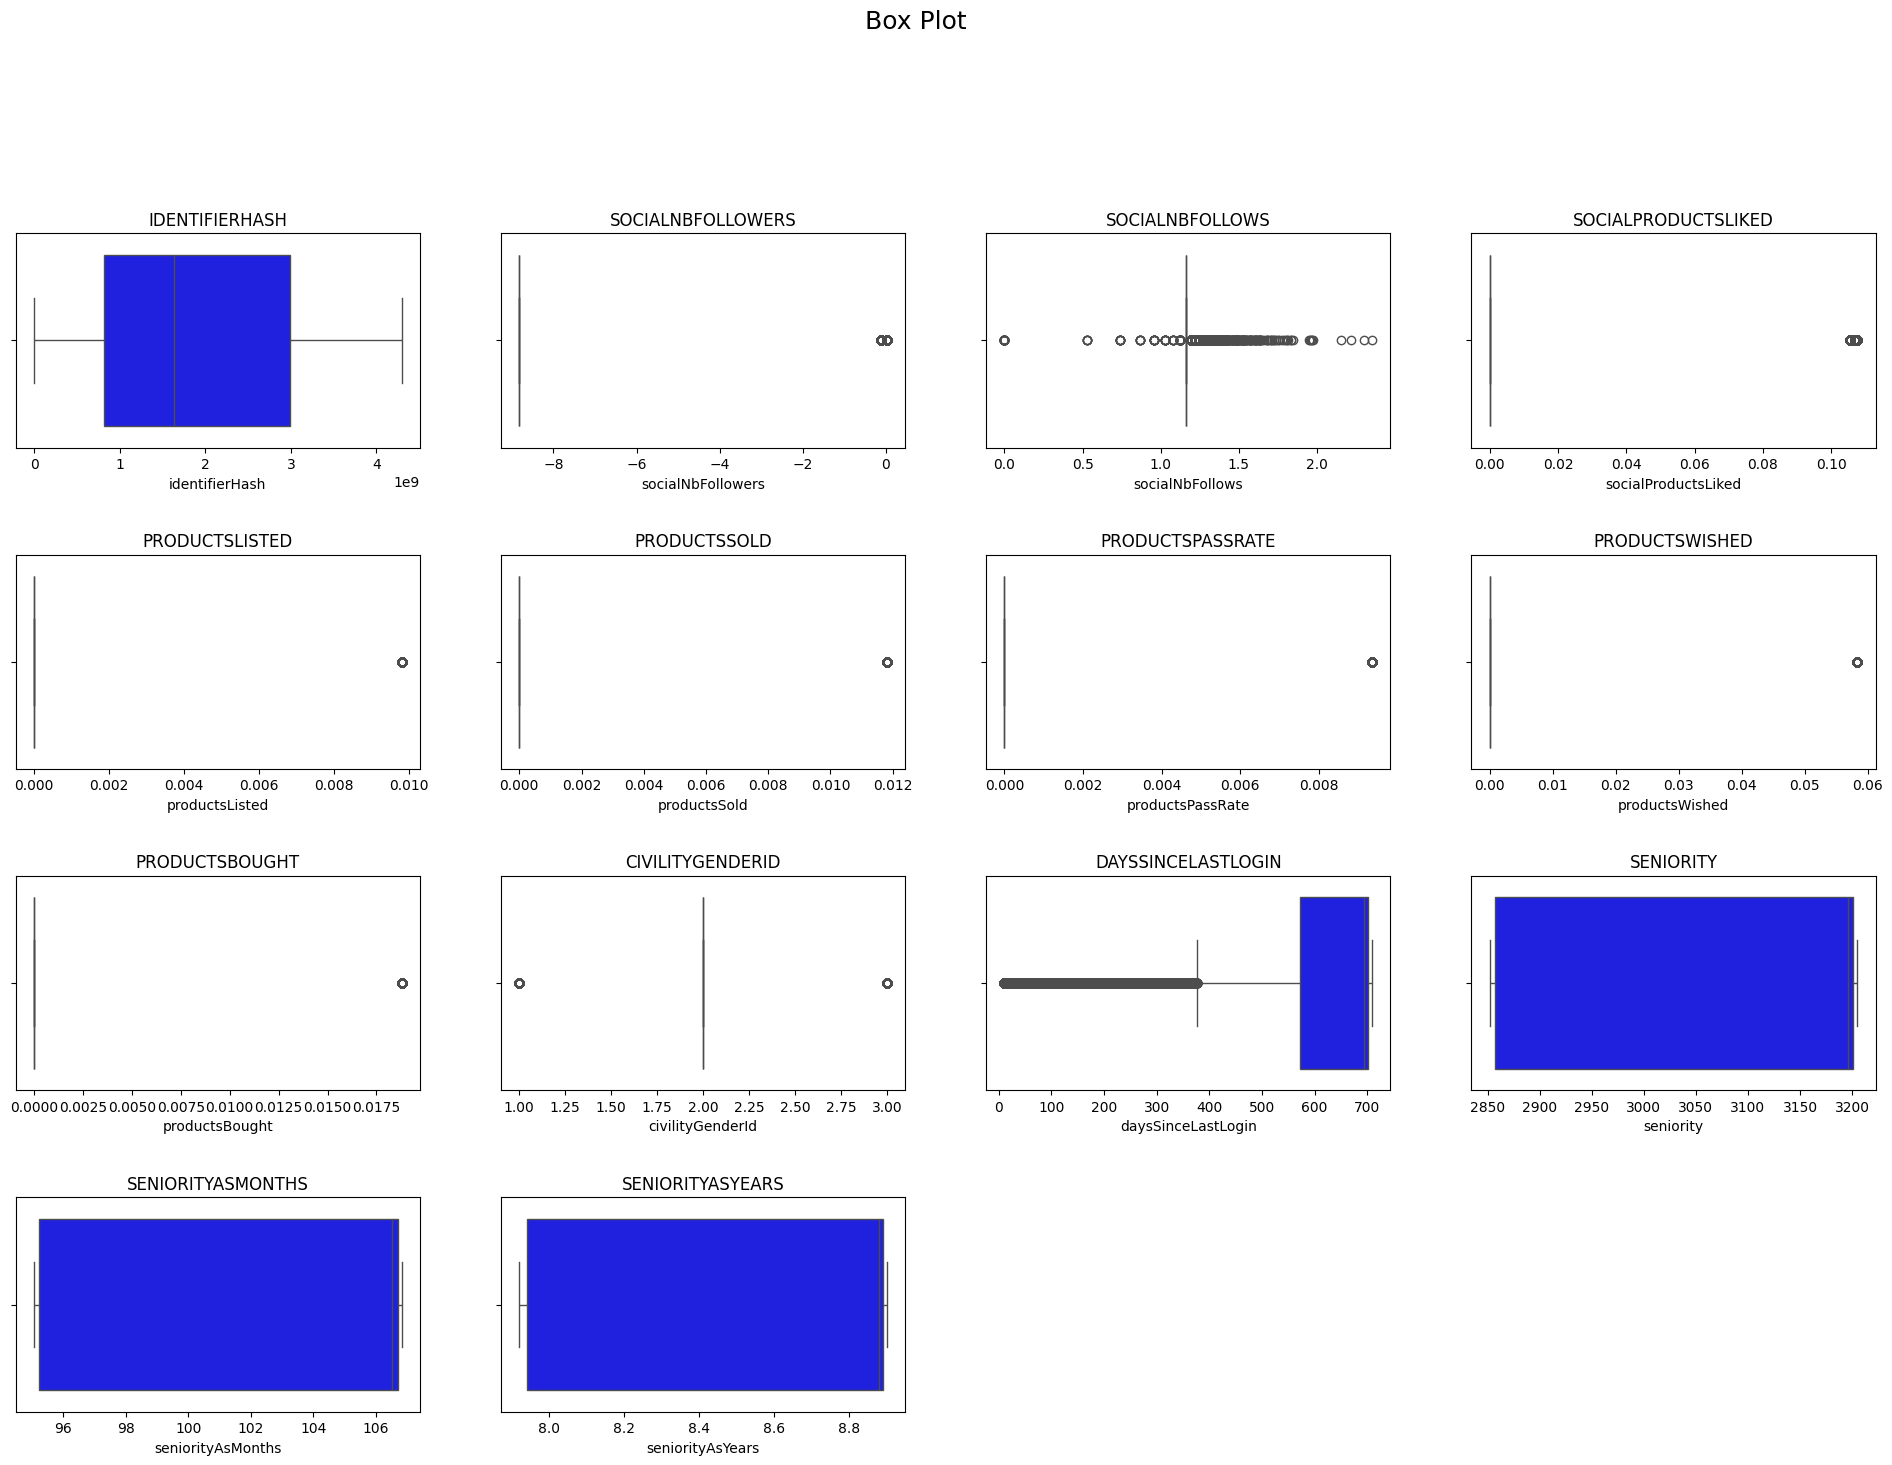

In [96]:
df= df.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(24, 32))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='blue', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [97]:
print("Outliers :")
print(df)

Outliers :
       identifierHash  type      country language  socialNbFollowers  \
0          1920991140  user  Royaume-Uni       en           0.023539   
1          1920925604  user       Monaco       en           0.023539   
2          1920860068  user       France       fr           0.023539   
3          1920794532  user   Etats-Unis       en           0.023539   
4          1920663460  user   Etats-Unis       en           0.023539   
...               ...   ...          ...      ...                ...   
98908      3957653410  user   Etats-Unis       fr          -8.820763   
98909      3957587874  user       France       fr          -8.820763   
98910      3957522338  user     Belgique       en          -8.820763   
98911      3957456802  user       Italie       it          -8.820763   
98912      3957391266  user       Guinée       fr          -8.820763   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0             1.223156             0.107640    

In [100]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:\n", numerical_cols)

Numerical columns:
 Index(['identifierHash', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought',
       'civilityGenderId', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears'],
      dtype='object')


In [102]:
# Compute Z-scores for numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers
threshold = 3
outliers = np.where(z_scores > threshold)

print("Outlier positions:", outliers)

Outlier positions: (array([    0,     0,     0, ..., 98889, 98898, 98898], dtype=int64), array([4, 5, 6, ..., 7, 7, 8], dtype=int64))


In [104]:
outliers_count = np.sum(outliers, axis = 0)
print("Number of outliers in each column:\n", dict(zip(numerical_cols, outliers_count)))

Number of outliers in each column:
 {'identifierHash': 4, 'socialNbFollowers': 5, 'socialNbFollows': 6, 'socialProductsLiked': 7, 'productsListed': 8, 'productsSold': 5, 'productsPassRate': 6, 'productsWished': 7, 'productsBought': 4, 'civilityGenderId': 6, 'daysSinceLastLogin': 7, 'seniority': 8, 'seniorityAsMonths': 9, 'seniorityAsYears': 10}


In [106]:
# Remove rows where any Z-score is above the threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print("Original data shape:", df.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)

Original data shape: (98913, 24)
Data shape after removing outliers: (85211, 24)


In [108]:
# Cap outliers
for col in numerical_cols:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

print("Outliers capped.")

Outliers capped.


In [110]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for numerical columns and keep it as a DataFrame
z_scores = pd.DataFrame(zscore(df[numerical_cols]), columns=numerical_cols)

# Set a threshold for identifying outliers
threshold = 3

# Replace outliers with the median
for col in numerical_cols:
    median = df[col].median()
    df[col] = np.where(z_scores[col] > threshold, median, df[col])

print("Outliers replaced with median.")

Outliers replaced with median.


In [112]:
def Find_Outliers_IQR(df_no):
     # Select only numeric columns
    numeric_df = df_no.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for outliers in each column and count the number of outliers
    outliers_count = (numeric_df < lower_bound) | (numeric_df> upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = Find_Outliers_IQR(df)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))


Number of outliers per column:
civilityGenderId       23229
daysSinceLastLogin     16584
socialProductsLiked    15926
socialNbFollowers      13974
socialNbFollows         2525
identifierHash             0
productsListed             0
productsSold               0
productsPassRate           0
productsWished             0
productsBought             0
seniority                  0
seniorityAsMonths          0
seniorityAsYears           0
dtype: int64


In [114]:
# Handling Outliers & Outlier treatments
print(col_list)
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  
  #removing outliers
  
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")
     

['identifierHash', 'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'civilityGenderId', 'daysSinceLastLogin', 'seniority', 'seniorityAsMonths', 'seniorityAsYears']
identifierHash 

Percentiles: 25th=819068835.000, 75th=2996174755.000, IQR=2177105920.000

lower = -2446590045.0 and upper = 6261833635.0 
 
Identified outliers: 0

-------

socialNbFollowers 

Percentiles: 25th=-8.821, 75th=-8.821, IQR=0.000

lower = -8.820763053864102 and upper = -8.820763053864102 
 
Identified outliers: 13974
socialNbFollowers Outliers Removed

-------

socialNbFollows 

Percentiles: 25th=1.162, 75th=1.162, IQR=0.000

lower = 1.1622831138840004 and upper = 1.1622831138840004 
 
Identified outliers: 2525
socialNbFollows Outliers Removed

-------

socialProductsLiked 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 15926
socialProductsLiked Outliers Re

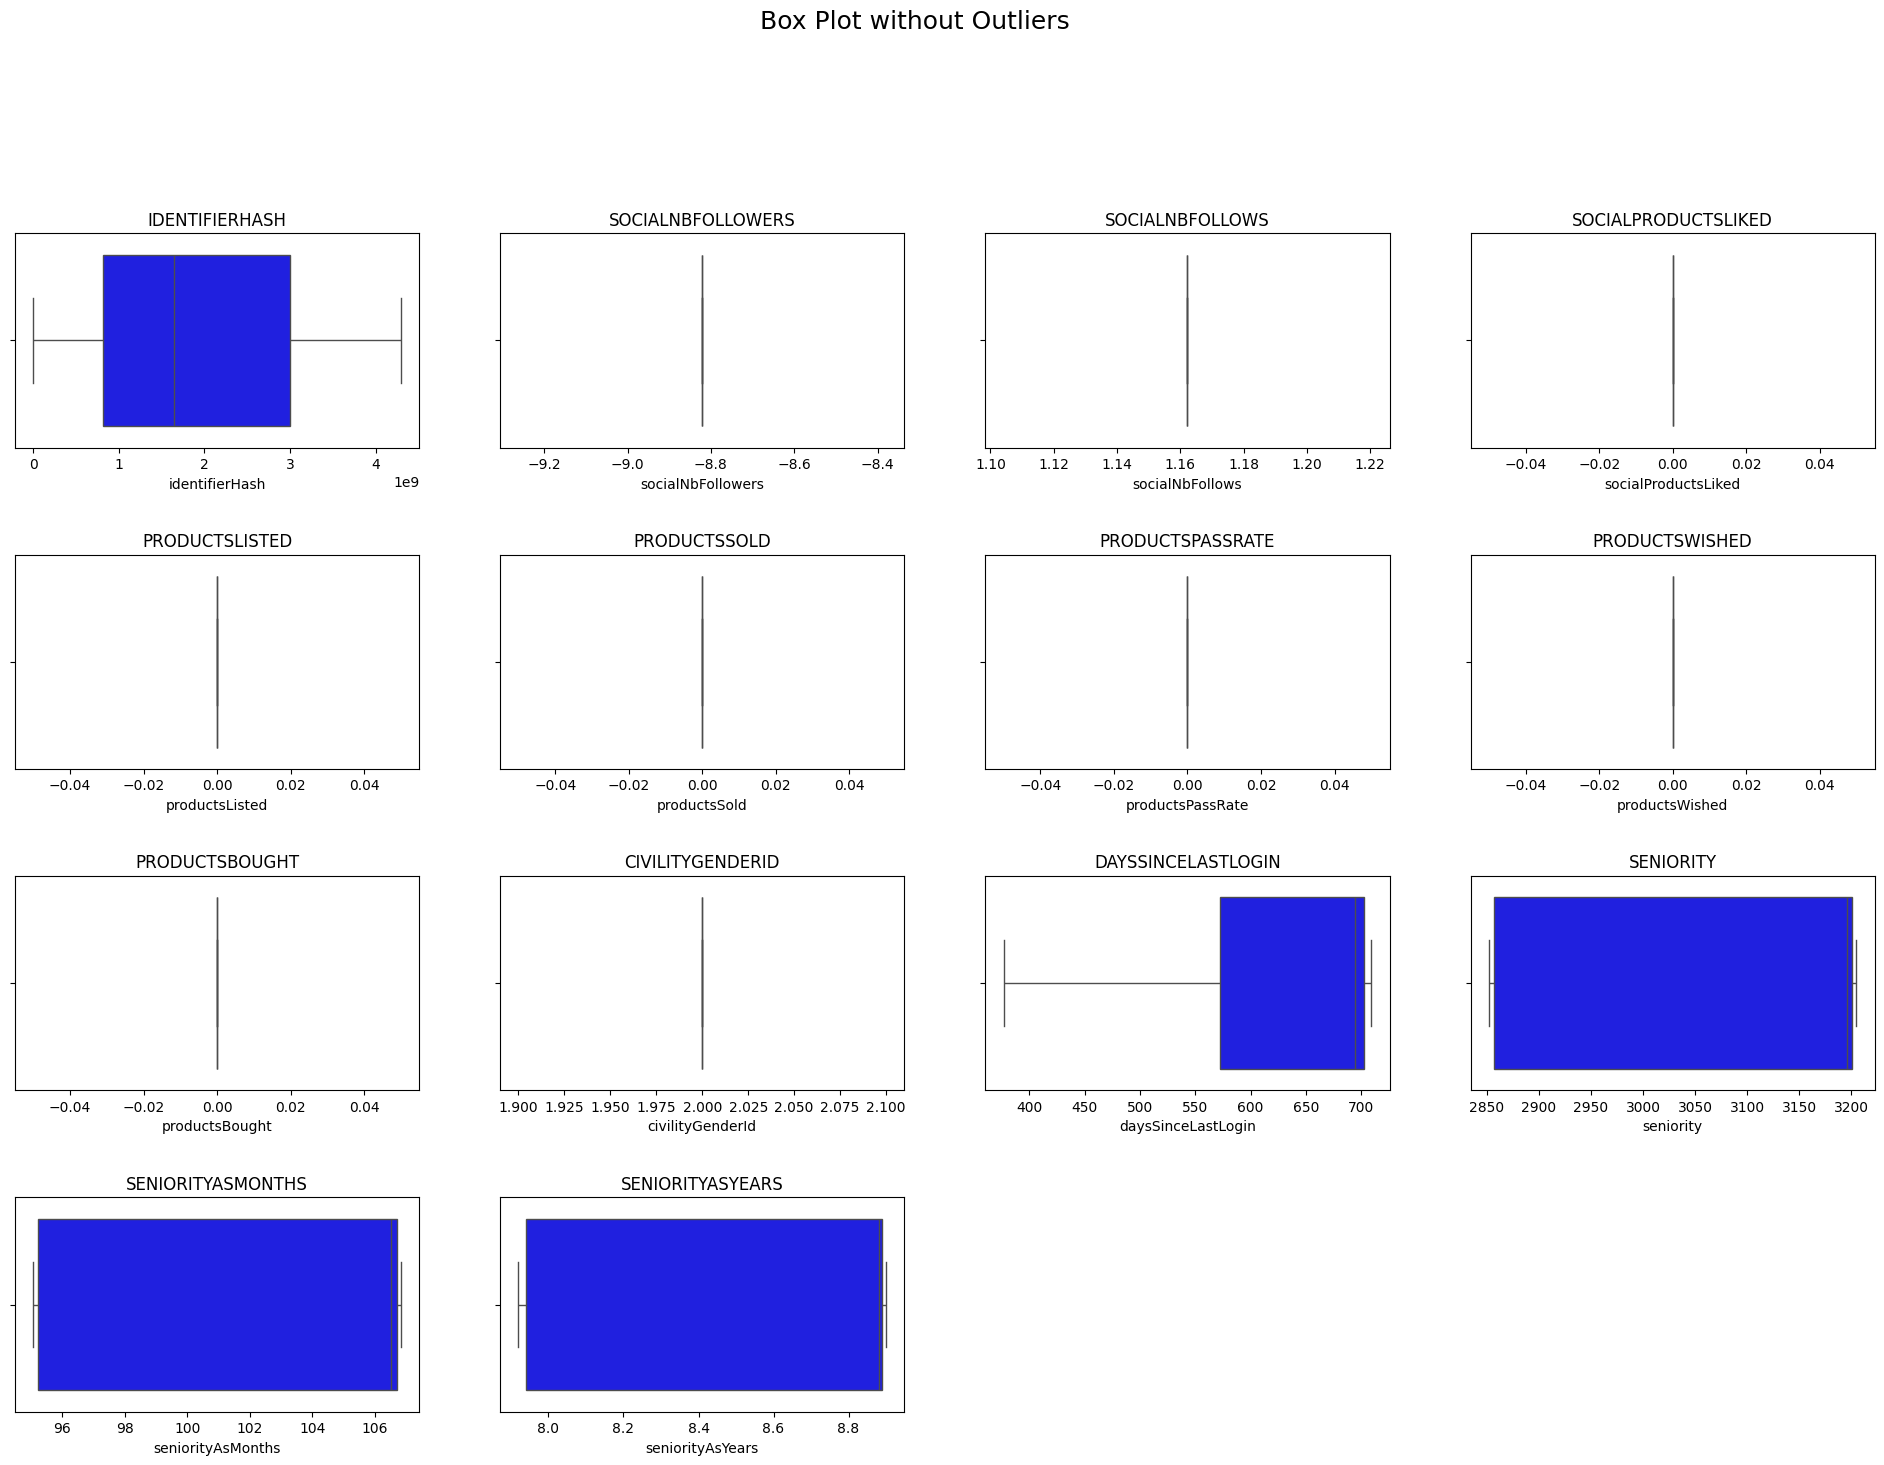

In [115]:
plt.figure(figsize=(24, 32))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='blue' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [118]:
outliers_count = df
outliers_count = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_count}")

Number of outliers removed: 13702


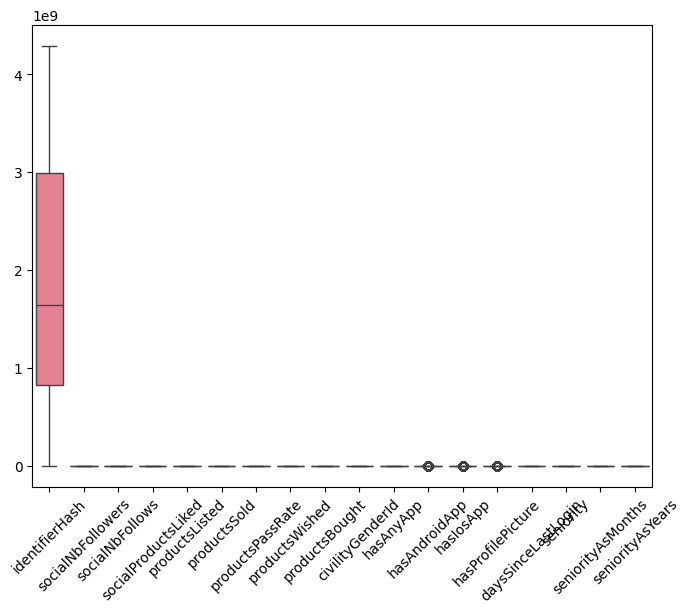

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

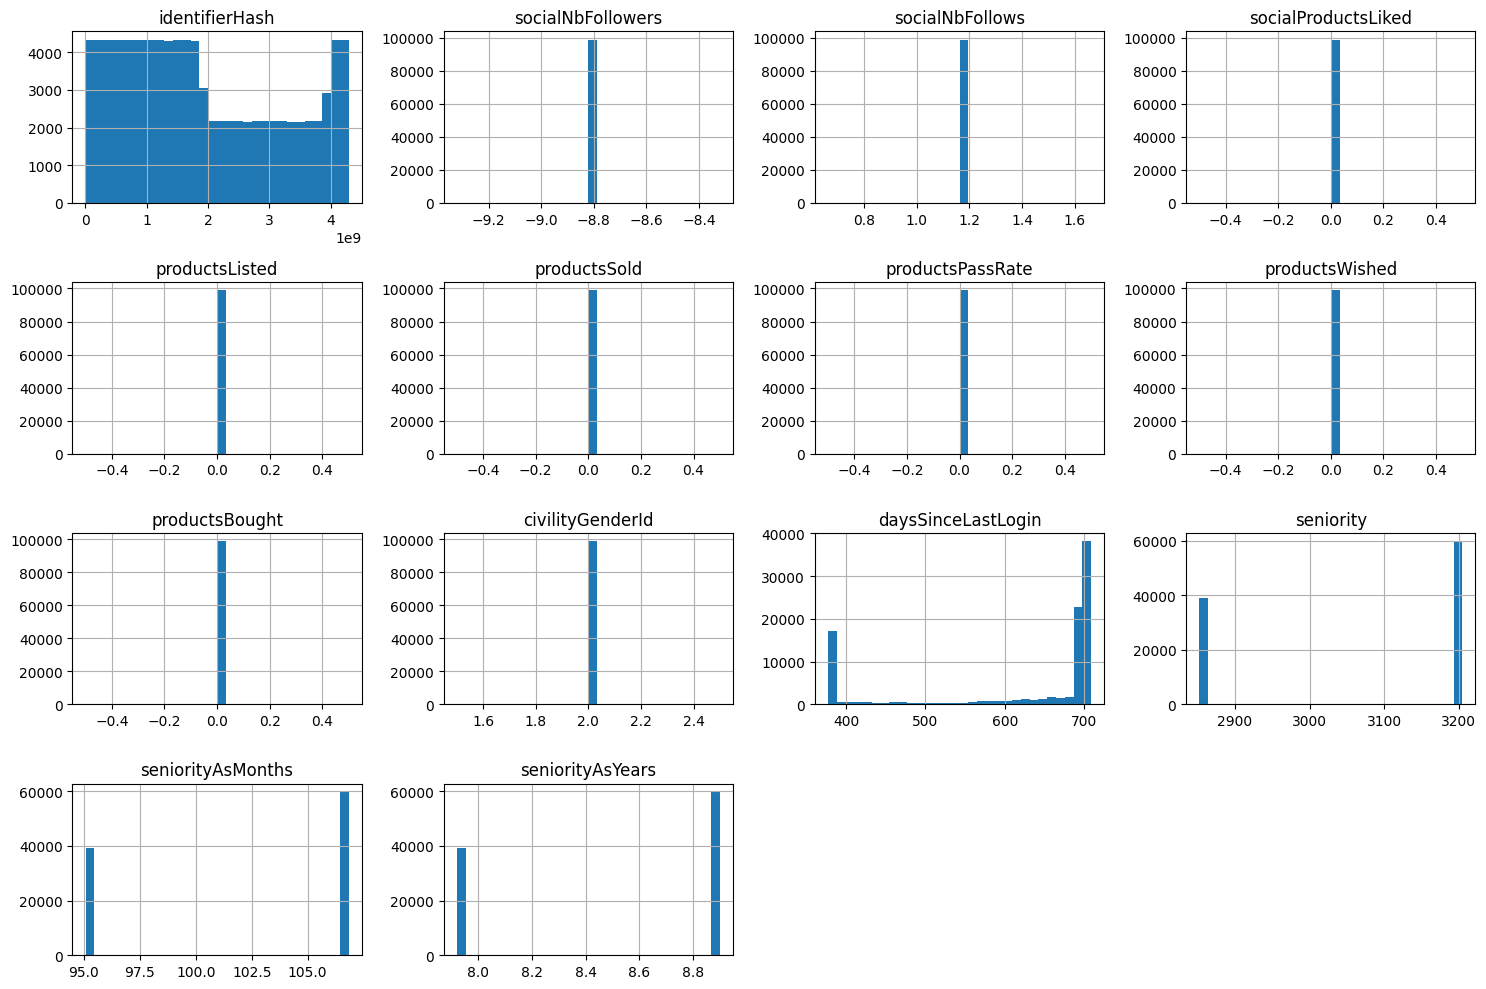

In [122]:
# Identify numeric columns in the DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [124]:
# After Removing outliers
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,9.891300e+04,9.891300e+04,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.0,98913.000000,98913.000000,98913.000000,98913.000000
mean,1.902340e+09,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,618.607686,3063.771870,102.125583,8.510424
std,1.285837e+09,1.732490e-11,1.894494e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.189185,168.298621,5.609735,0.467863
min,6.544300e+04,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,377.000000,2852.000000,95.070000,7.920000
25%,8.190688e+08,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,572.000000,2857.000000,95.230000,7.940000
50%,1.638924e+09,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,694.000000,3196.000000,106.530000,8.880000
75%,2.996175e+09,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,702.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,-8.820763e+00,1.162283e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,709.000000,3205.000000,106.830000,8.900000


In [126]:
df.shape

(98913, 24)

#### Rows = 98913 and Columns = 24

In [129]:
PurchaseCounts = df["productsBought"]. value_counts()
PurchaseCounts.reset_index()

,productsBought,count
0,0.0,98913


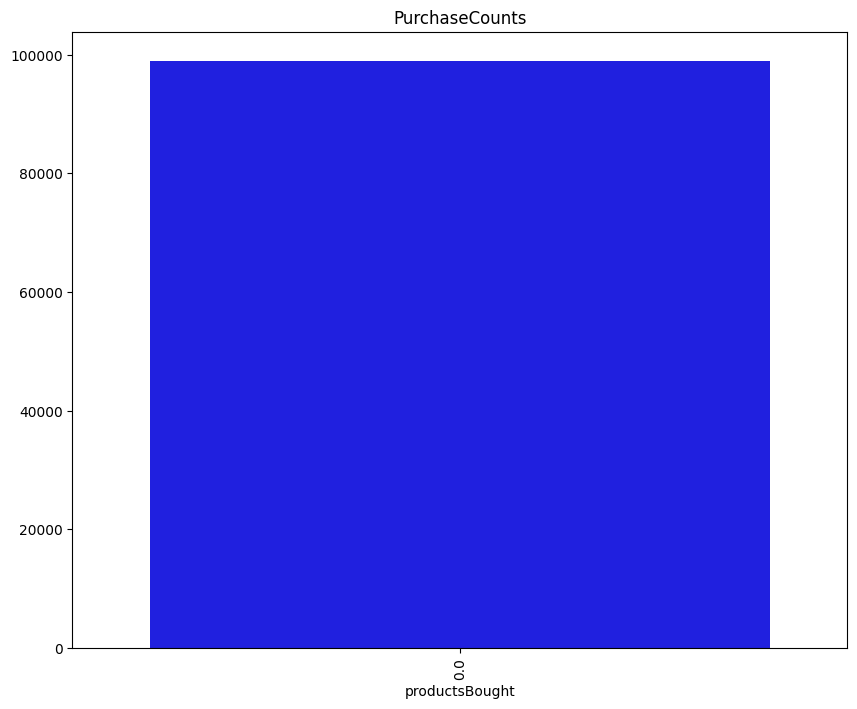

In [131]:
plt.figure(figsize = (10,8))
sns.barplot(x=PurchaseCounts.index,color='blue', y=PurchaseCounts.values)
plt.title("PurchaseCounts")
plt.xticks(rotation=90)
plt.show()

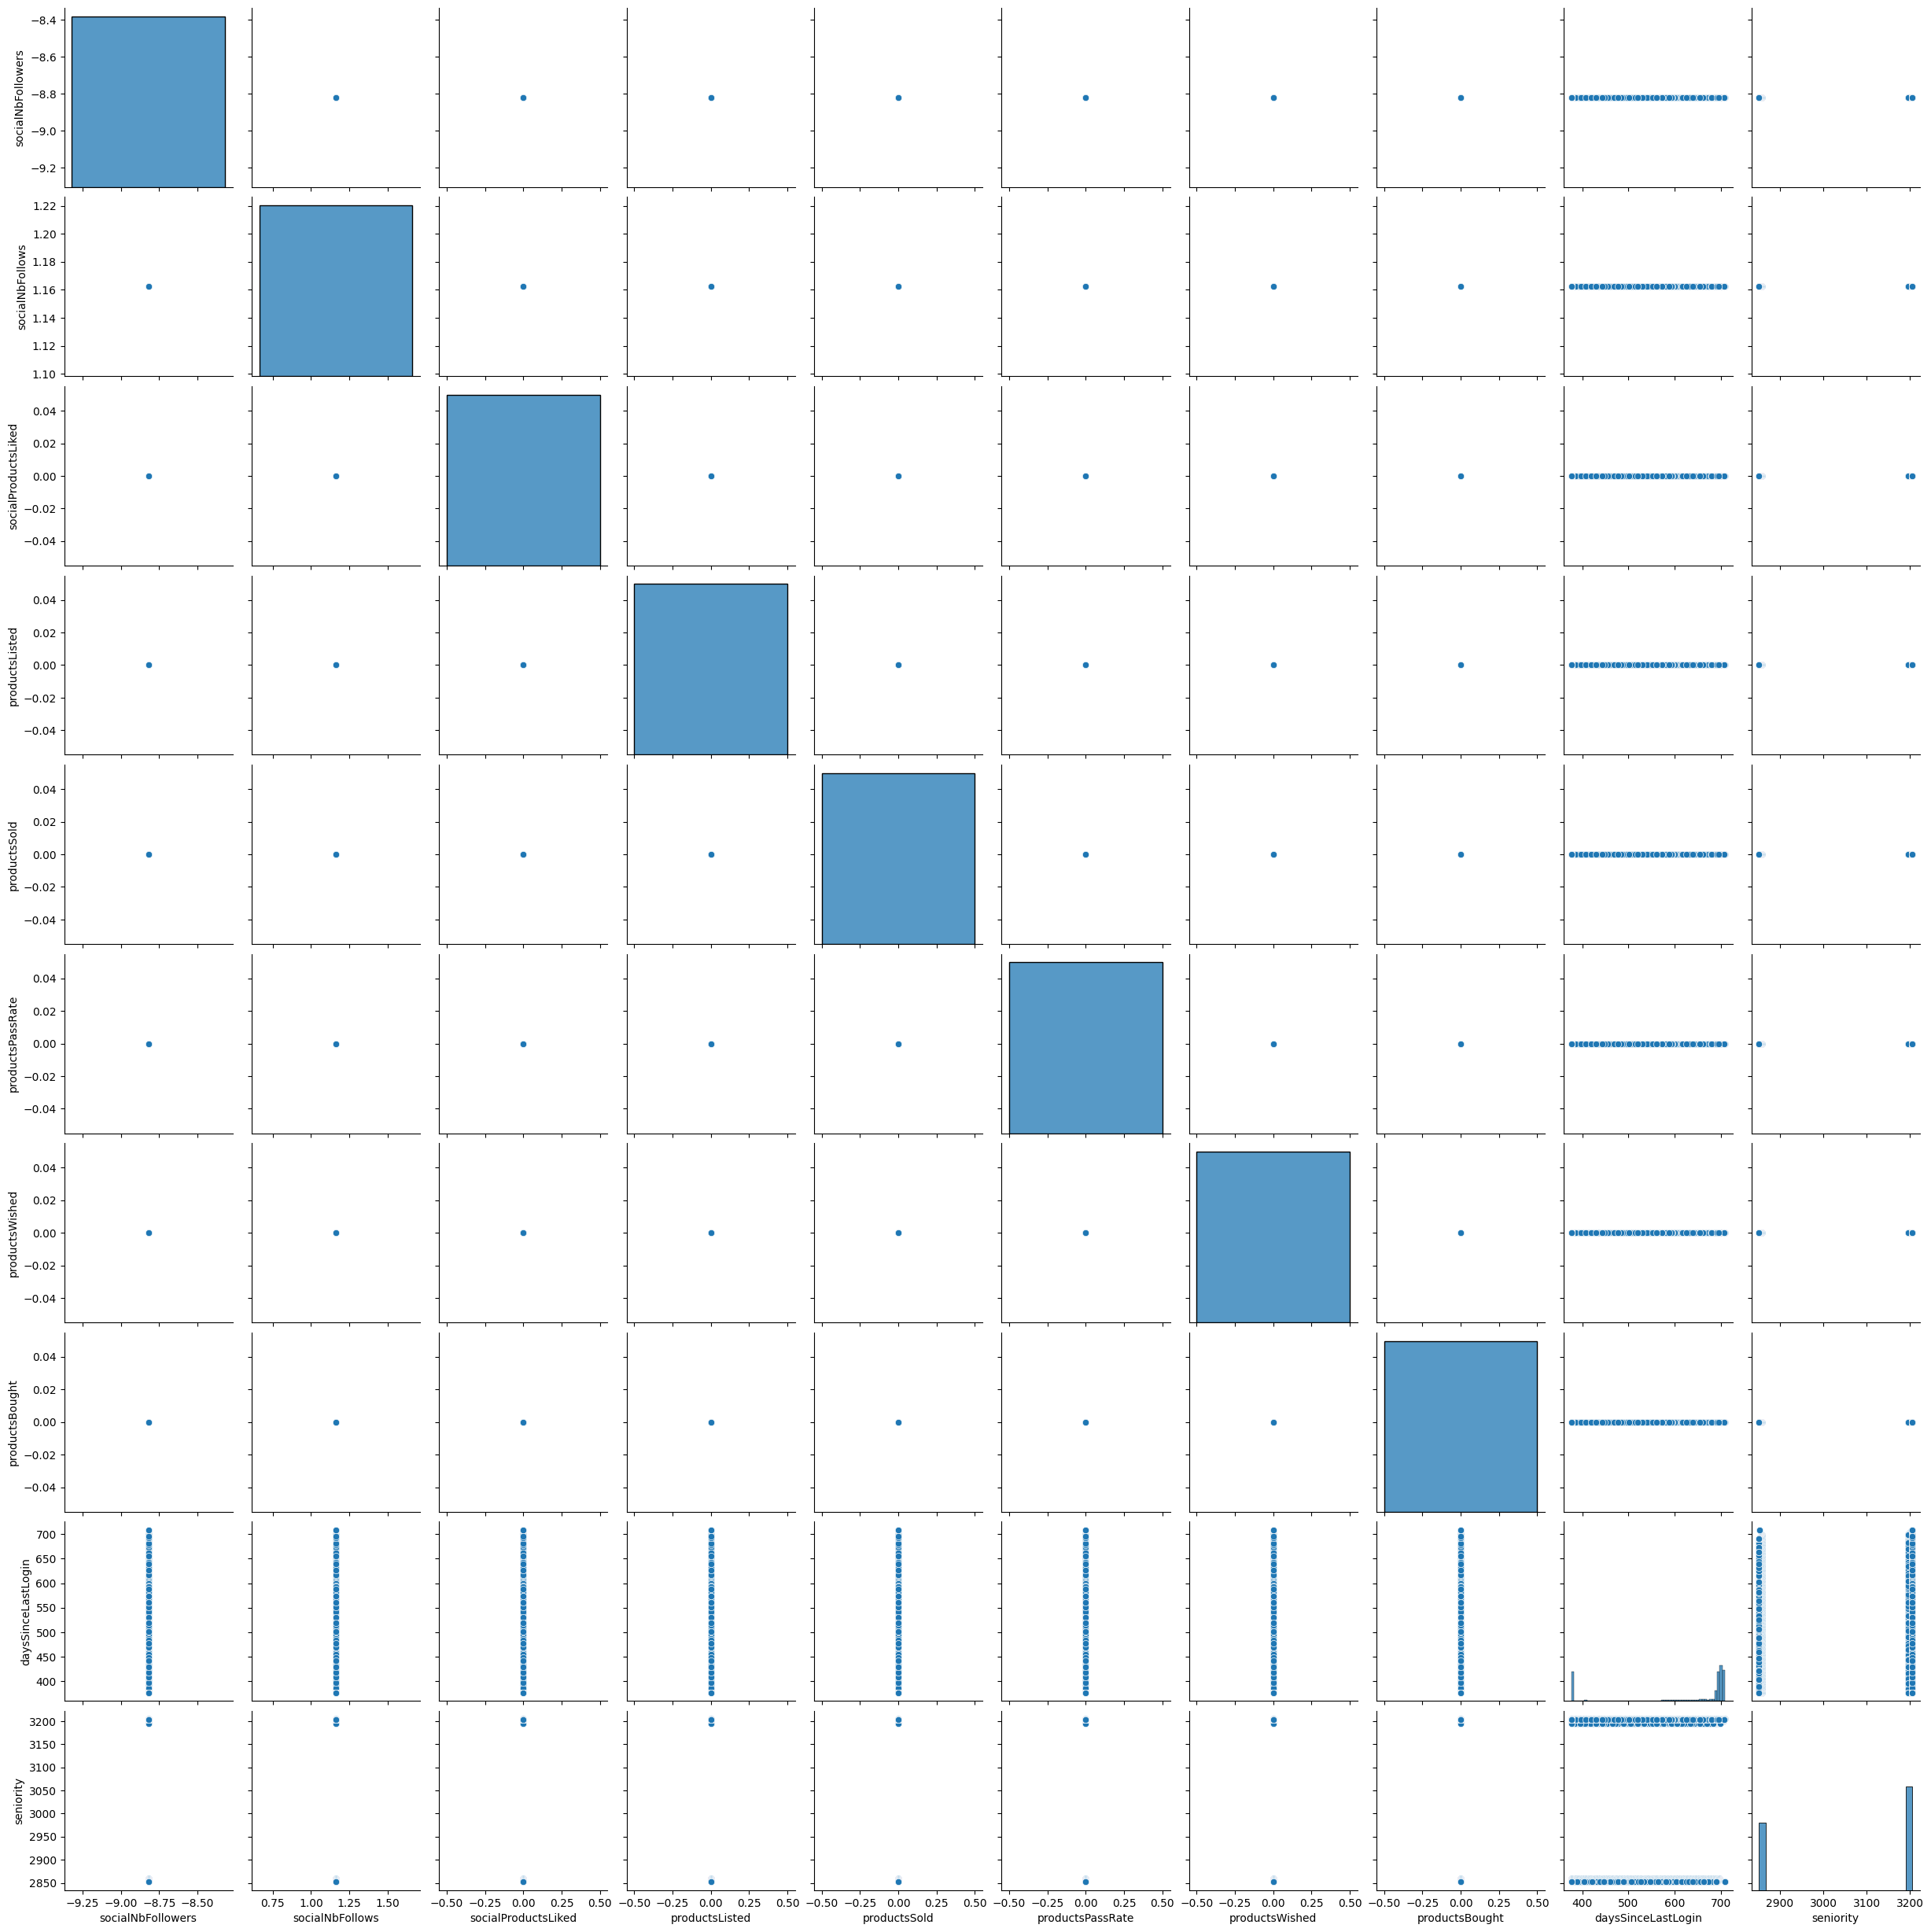

In [133]:
sns.pairplot(df[['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']])

## Encode categorical features

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  float64
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  float64
 5   socialNbFollows      98913 non-null  float64
 6   socialProductsLiked  98913 non-null  float64
 7   productsListed       98913 non-null  float64
 8   productsSold         98913 non-null  float64
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  float64
 11  productsBought       98913 non-null  float64
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  float64
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [138]:
print("Dataset Shape:", df.shape)

Dataset Shape: (98913, 24)


In [140]:
print("Cloumns:",df.columns)

Cloumns: Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')


In [142]:
print(df.head())

   identifierHash  type      country language  socialNbFollowers  \
0    1.920991e+09  user  Royaume-Uni       en          -8.820763   
1    1.920926e+09  user       Monaco       en          -8.820763   
2    1.920860e+09  user       France       fr          -8.820763   
3    1.920795e+09  user   Etats-Unis       en          -8.820763   
4    1.920663e+09  user   Etats-Unis       en          -8.820763   

   socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0         1.162283                  0.0             0.0           0.0   
1         1.162283                  0.0             0.0           0.0   
2         1.162283                  0.0             0.0           0.0   
3         1.162283                  0.0             0.0           0.0   
4         1.162283                  0.0             0.0           0.0   

   productsPassRate  ...  civilityTitle  hasAnyApp hasAndroidApp  hasIosApp  \
0               0.0  ...             mr       True         False       Tr

###  Objective Columns


In [147]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column)

type
country
language
gender
civilityTitle
countryCode


In [149]:
for column in df.columns:
    if df[column].dtype == "bool":
        print(column)

hasAnyApp
hasAndroidApp
hasIosApp
hasProfilePicture


### Label Encoder

In [152]:
label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
df["country"] = label_encoder.fit_transform(df["country"])
df["language"] = label_encoder.fit_transform(df["language"])
df["gender"] = label_encoder.fit_transform(df["gender"])
df["civilityTitle"] = label_encoder.fit_transform(df["civilityTitle"])
df["countryCode"] = label_encoder.fit_transform(df["countryCode"])
df["hasAnyApp"] = label_encoder.fit_transform(df["hasAnyApp"])
df["hasAndroidApp"] = label_encoder.fit_transform(df["hasAndroidApp"])
df["hasIosApp"] = label_encoder.fit_transform(df["hasIosApp"])
df["hasProfilePicture"] = label_encoder.fit_transform(df["hasProfilePicture"])
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1.920991e+09,0,145,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,1,1,0,1,1,377.0,3196.0,106.53,8.88,66
1,1.920926e+09,0,119,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,1,0,1,1,377.0,3204.0,106.80,8.90,119
2,1.920860e+09,0,58,3,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,1,0,1,0,377.0,3203.0,106.77,8.90,64
3,1.920795e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,1,0,1,0,377.0,3198.0,106.60,8.88,185
4,1.920663e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,377.0,2854.0,95.13,7.93,185


In [154]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = label_encoder.fit_transform(df[col])



In [156]:
df.head()
df.dtypes
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

if len(object_columns) > 0:
    df.describe(include="object")

else:
    print("No object columns found in the dataset.")

Index([], dtype='object')
No object columns found in the dataset.


 ### Correlation Matrix

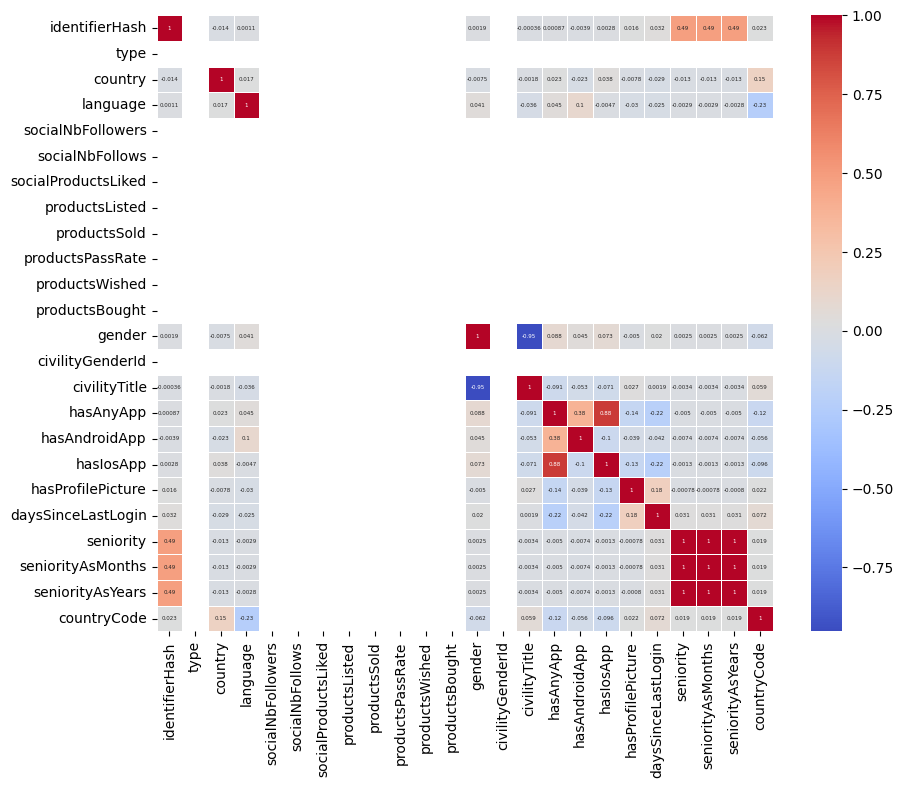

In [159]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True, linewidths=.5, annot_kws={"size": 4})
plt.show()

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  float64
 1   type                 98913 non-null  int32  
 2   country              98913 non-null  int32  
 3   language             98913 non-null  int32  
 4   socialNbFollowers    98913 non-null  float64
 5   socialNbFollows      98913 non-null  float64
 6   socialProductsLiked  98913 non-null  float64
 7   productsListed       98913 non-null  float64
 8   productsSold         98913 non-null  float64
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  float64
 11  productsBought       98913 non-null  float64
 12  gender               98913 non-null  int32  
 13  civilityGenderId     98913 non-null  float64
 14  civilityTitle        98913 non-null  int32  
 15  hasAnyApp            98913 non-null 

### Feature Selection

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Identifying Input and Target Columns

In [167]:
X = df.drop("productsBought", axis=1)  # Features
y = df["productsBought"]                # Target variable



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (79130, 23) (79130,)
Test set shape: (19783, 23) (19783,)


In [169]:
X_train 

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
6536,1.487339e+09,0,145,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,702.0,3203.0,106.77,8.90,66
28394,3.833847e+07,0,87,4,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,1,1,0,1,1,662.0,3201.0,106.70,8.89,94
23868,3.386244e+08,0,53,2,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,58
1288,1.835598e+09,0,87,4,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,1,0,1,1,377.0,2853.0,95.10,7.92,94
31757,4.110156e+09,0,165,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,704.0,3200.0,106.67,8.89,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71429,1.482293e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,696.0,2857.0,95.23,7.94,185
29010,4.291756e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,705.0,3201.0,106.70,8.89,185
62976,2.044199e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,698.0,2859.0,95.30,7.94,185
46752,3.117547e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,701.0,3197.0,106.57,8.88,185


In [171]:
X_test

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
40081,3.559784e+09,0,64,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,503.0,3199.0,106.63,8.89,75
64303,1.955987e+09,0,145,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,698.0,2859.0,95.30,7.94,66
33550,3.991601e+09,0,145,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,377.0,3205.0,106.83,8.90,66
50782,2.851406e+09,0,145,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,377.0,3197.0,106.57,8.88,66
38015,3.696492e+09,0,55,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,702.0,3199.0,106.63,8.89,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40741,3.516006e+09,0,58,3,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,377.0,3199.0,106.63,8.89,64
71289,1.491534e+09,0,87,4,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,1,1,0,1,1,377.0,2857.0,95.23,7.94,94
26836,1.420820e+08,0,136,1,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,1,0,0,0,1,705.0,3201.0,106.70,8.89,140
45215,3.219456e+09,0,87,4,-8.820763,1.162283,0.0,0.0,0.0,0.0,...,2,0,0,0,1,379.0,3198.0,106.60,8.88,94


In [198]:
print("y_train column: ", y_train)
print("y_test column: ", y_test)

y_train column:  6536     0.0
28394    0.0
23868    0.0
1288     0.0
31757    0.0
        ... 
71429    0.0
29010    0.0
62976    0.0
46752    0.0
55697    0.0
Name: productsBought, Length: 79130, dtype: float64
y_test column:  40081    0.0
64303    0.0
33550    0.0
50782    0.0
38015    0.0
        ... 
40741    0.0
71289    0.0
26836    0.0
45215    0.0
81816    0.0
Name: productsBought, Length: 19783, dtype: float64


In [200]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (79130, 23)
X_test shape: (19783, 23)


### K Selected Features

In [202]:
# Select top K features based on F-test

k = 15  # You can adjust the number of features you want to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['productsSold', 'productsPassRate', 'productsWished', 'gender',
       'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
       'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')


### Scaling the Selected Features

In [268]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
print("Train columns:", X_train.columns)
print("Test columns:", X_test.columns)

Train columns: Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'gender',
       'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
       'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')
Test columns: Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'gender',
       'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
       'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')


### Principal Component Analysis (PCA)

In [272]:
# Apply PCA to retain 95% variance
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of PCA components:", X_train_pca.shape[1], "," , X_test_pca.shape[1])

Number of PCA components: 10 , 10


## Machine Learning Models

In [274]:
print(df.head())

   identifierHash  type  country  language  socialNbFollowers  \
0    1.920991e+09     0      145         1          -8.820763   
1    1.920926e+09     0      119         1          -8.820763   
2    1.920860e+09     0       58         3          -8.820763   
3    1.920795e+09     0       55         1          -8.820763   
4    1.920663e+09     0       55         1          -8.820763   

   socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0         1.162283                  0.0             0.0           0.0   
1         1.162283                  0.0             0.0           0.0   
2         1.162283                  0.0             0.0           0.0   
3         1.162283                  0.0             0.0           0.0   
4         1.162283                  0.0             0.0           0.0   

   productsPassRate  ...  civilityTitle  hasAnyApp  hasAndroidApp  hasIosApp  \
0               0.0  ...              1          1              0          1   
1         

In [276]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  float64
 1   type                 98913 non-null  int32  
 2   country              98913 non-null  int32  
 3   language             98913 non-null  int32  
 4   socialNbFollowers    98913 non-null  float64
 5   socialNbFollows      98913 non-null  float64
 6   socialProductsLiked  98913 non-null  float64
 7   productsListed       98913 non-null  float64
 8   productsSold         98913 non-null  float64
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  float64
 11  productsBought       98913 non-null  float64
 12  gender               98913 non-null  int32  
 13  civilityGenderId     98913 non-null  float64
 14  civilityTitle        98913 non-null  int32  
 15  hasAnyApp            98913 non-null 

In [278]:
print(df.describe())

       identifierHash     type       country      language  socialNbFollowers  \
count    9.891300e+04  98913.0  98913.000000  98913.000000       9.891300e+04   
mean     1.902340e+09      0.0     70.821267      1.757201      -8.820763e+00   
std      1.285837e+09      0.0     42.515815      1.154693       1.732490e-11   
min      6.544300e+04      0.0      0.000000      0.000000      -8.820763e+00   
25%      8.190688e+08      0.0     55.000000      1.000000      -8.820763e+00   
50%      1.638924e+09      0.0     58.000000      1.000000      -8.820763e+00   
75%      2.996175e+09      0.0     87.000000      3.000000      -8.820763e+00   
max      4.294967e+09      0.0    199.000000      4.000000      -8.820763e+00   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  \
count     9.891300e+04              98913.0         98913.0       98913.0   
mean      1.162283e+00                  0.0             0.0           0.0   
std       1.894494e-12                 

### Train Machine Learning Models

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [282]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train each model and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Training on the selected features
    predictions[model_name] = model.predict(X_test_pca)  # Store predictions for later evaluation

In [284]:
###Use Regression Models
###Replace the classification models with regression models. Here are some common regression models:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [286]:
###Evaluate Using Regression Metrics
##For regression tasks, you would evaluate models using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.
###Here’s how you could calculate these metrics for each regression model:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results = []


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Model:")
print(results_df)

Evaluation Metrics for Each Model:
                      Model  MSE  RMSE  MAE  R2 Score
0         Linear Regression  0.0   0.0  0.0       1.0
1             Decision Tree  0.0   0.0  0.0       1.0
2             Random Forest  0.0   0.0  0.0       1.0
3  Support Vector Regressor  0.0   0.0  0.0       1.0


In [288]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are your feature matrix and target vector
# Replace X and y with your actual data
# Example: X = df.drop(columns='target'), y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Loop through models, train, predict, and display regression metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results
    print(f"\nMetrics for {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R² Score: {r2}")


Metrics for Linear Regression:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Decision Tree Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Random Forest Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Gradient Boosting Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Support Vector Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0
